In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
# from numba import jit

from utils import *
from benchmark_utils import print_dict, score_ts

from models import *


%load_ext autoreload
%autoreload 2

# Make demonstration dataset

"Detection of periodic driving in nonautonomous difference equations"

(0.0, 0.009259259259259259)

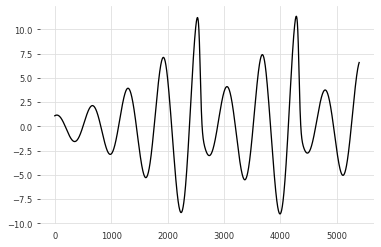

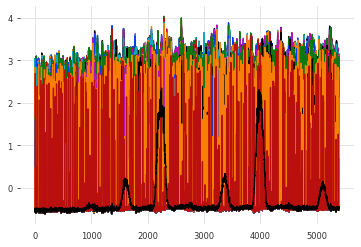

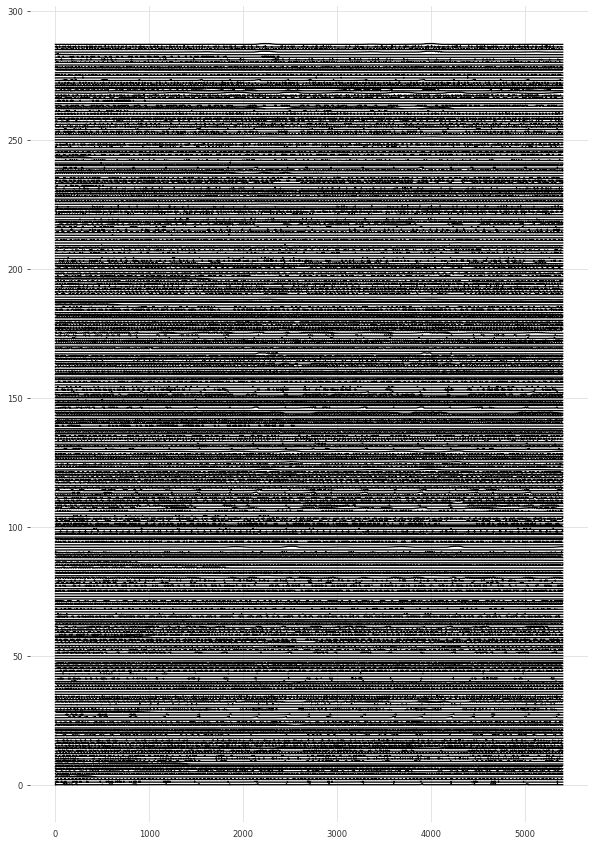

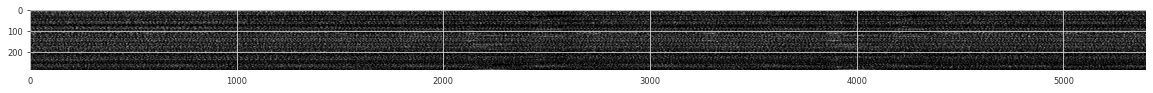

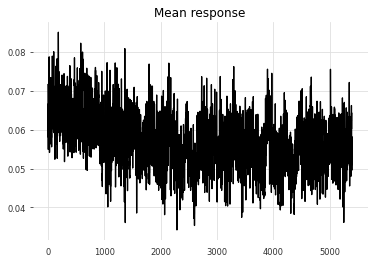

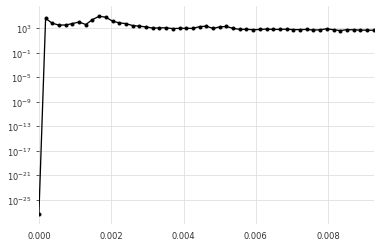

In [14]:
## Continuous-time data
## try FitzHugh-Nagumo as a response system

def rossler(x, y, z, t, a, b, c):
    xdot = -y - z
    ydot = x + a * y
    zdot = b + z * (x - c)
    return xdot, ydot, zdot


def torus(x, y, z, t, a, n, r):
    xdot = (-a * n * np.sin(n * t)) * np.cos(t) - (r + a * np.cos(n * t)) * np.sin(
        t
    )
    ydot = (-a * n * np.sin(n * t)) * np.sin(t) + (r + a * np.cos(n * t)) * np.cos(
        t
    )
    zdot = a * n * np.cos(n * t)
    return xdot, ydot, zdot

def vanderpol(x, y, z, t, a, mu, w):
    ydot = mu * (1 - x ** 2) * y - x + a * np.sin(z)
    xdot = y
    zdot = w
    return xdot, ydot, zdot


class DrivenVanDerPol:
    """
    """
    def __init__(self, random_state=None):
        
        # driver properties
        self.ad = 0.5
        self.n = 5.3
        self.r = 1
        
        # response properties
#         self.ar = 1.2
#         self.mu = 8.53
#         self.w = 0.63
        self.rho = 28
        self.beta = 2.667
        self.sigma = 10
        
        self.n_drive = 3
        self.n_response = 3
        
        ## rossler
        self.a = 0.2
        self.b = 0.2
        self.c = 5.7
        
        np.random.seed(random_state)
        self.n_sys = 24
        self.rho = 28 * (1 + 0.5*(np.random.random(self.n_sys) - 0.5))
        self.beta = 2.667 * (1 + 0.1*(np.random.random(self.n_sys) - 0.5))
        self.sigma = 10 * (1 + 0.1*(np.random.random(self.n_sys) - 0.5))
        

        self.n_sys = 12 * 3 * 2 * 4
#         self.n_sys = 12 * 3 * 2
#         self.n_sys = 12
        self.rho = 28 * (1 + 1 + 0.5*(np.random.random(self.n_sys) - 0.5))
        self.beta = 2.667 * (1 + 0.1*(np.random.random(self.n_sys) - 0.5))
        self.sigma = 10 * (1 + 0.1*(np.random.random(self.n_sys) - 0.5))
        
        
        
        self.rho = 28 * (1 + 1 + 0.1 * (np.random.random(self.n_sys) - 0.5))
        self.beta = 2.667 * (1 + 0.1 * (np.random.random(self.n_sys) - 0.5))
        self.sigma = 10 * (1 + 2 * (np.random.random(self.n_sys) - 0.5))
        
        
        self.rho = 28 * (1 + 5 * (np.random.random(self.n_sys)))
        self.beta = 2.667 * (1 +  0.1 * (np.random.random(self.n_sys)))
        self.sigma = 10 * (1 + 20 * (np.random.random(self.n_sys) ))
        
        
        
        self.rho = 28 * (1 + 5 * (np.random.random(self.n_sys)))
        self.beta = 2.667 * (1 +  1 * (np.random.random(self.n_sys)))
        self.sigma = 10 * (1 + 10 * (np.random.random(self.n_sys) ))
        

#     def rhs_driver(self, t, X):
#         """
#         Add a quadratic potential in order to attract towards origin
#         """
#         x, y, z = X
#         a, n, r = self.ad, self.n, self.r
#         xdot = (-a * n * np.sin(n * t)) * np.cos(t) - (r + a * np.cos(n * t)) * np.sin(
#             t
#         ) - x
#         ydot = (-a * n * np.sin(n * t)) * np.sin(t) + (r + a * np.cos(n * t)) * np.cos(
#             t
#         ) - y
#         zdot = a * n * np.cos(n * t) - z
#         return xdot, ydot, zdot


#     def rhs_driver(self, t, X):
#         """Simple periodic driver"""
#         x, y, z = X
#         a, n, r = self.ad, self.n, self.r
#         xdot = a * np.sin(t) - x
#         ydot =  a * np.sin(t) - y
#         zdot =  a * np.sin(t) - z
#         return xdot, ydot, zdot


    # Rossler driving (aperiodic)
    def rhs_driver(self, t, X):
        x, y, z = X
        a, b, c = self.a, self.b, self.c
        xdot = -y - z
        ydot = x + a * y
        zdot = b + z * (x - c)
        return xdot * 0.5, ydot * 0.5, zdot * 0.5
    
#     def rhs_response(self, t, X):
#         ar, mu = self.ar, self.mu
#         xd, yd, zd = X[:self.n_drive]
#         x, y, z = X[self.n_drive:]
#         #ydot = mu * (1 - x ** 2) * y - x + ar * np.sin(z)
#         ydot = mu * (1 - x ** 2) * y - x + ar * xd
#         xdot = y
#         zdot = self.w
#         return xdot, ydot, zdot


#     def rhs_response(self, t, X):
#         xd, yd, zd = X[:self.n_drive]
#         x, y, z = X[self.n_drive:]
#         beta, rho, sigma = self.beta, self.rho, self.sigma
#         xdot = sigma * (y - x) + self.ar * xd
#         ydot = x * (rho - z) - y
#         zdot = x * y - beta * z
#         return xdot, ydot, zdot
    
#     def rhs_response_ensemble(self, t, X):
#         Xd = X[0]
#         x, y, z = Xr[::self.n_response], Xr[1::self.n_response], Xr[2::self.n_response]
#         self.rhs_response([Xd, x, y, z])
    
    
    def rhs_response_ensemble(self, t, X):
        
        Xd = X[:self.n_drive]
        Xr = X[self.n_drive:]
        #n_sys = len(np.asarray(sigma))
        
        xd, yd, zd = Xd
        x, y, z = Xr[:self.n_sys], Xr[self.n_sys:2*self.n_sys], Xr[2 * self.n_sys:]

        xdot = self.sigma * (y - x) + self.ar * xd
        ydot = x * (self.rho - z) - y # - self.ar * xd
        zdot = x * y - self.beta * z
        return np.hstack([xdot, ydot, zdot])
    
    def rhs(self, t, X):
        return [*self.rhs_driver(t, X[:self.n_drive]), *self.rhs_response_ensemble(t, X)]
    
eq = DrivenVanDerPol(random_state=0)

# eq.ar = 20*2 * (np.random.random(eq.n_sys) - 0.5) * 2 # equiv to 20*3

## Strong  signal
eq.ar = 8 * 16 * 20 * np.random.choice([-1, 1], eq.n_sys)

## Weak signal
eq.ar = 16 * 20 * np.random.choice([-1, 1], eq.n_sys)

#eq.ar = 8 * 20 * np.random.choice([-1, 1], eq.n_sys)
eq.ar =  8 * 20 * 2 * (np.random.random(eq.n_sys)  - 0.5)

# rossler
# eq.ar =  16 * 20 * 2 * (np.random.random(eq.n_sys)  - 0.5)
# eq.ar = 4 * 20 * np.random.choice([-1, 1], eq.n_sys) # n = 12

from scipy.integrate import solve_ivp

ic = np.random.random(3 + 3 * eq.n_sys)
ic[:3] = 0.0
tpts0 = np.linspace(0, 60, 6000)


# sol0 = solve_ivp(eq.rhs, [0, np.max(tpts0)], ic, t_eval=tpts0)

tpts0 = np.linspace(0, 60, 3000)
tpts0 = np.linspace(0, 3*60, 9000)
sol0 = solve_ivp(eq.rhs, [0, np.max(tpts0)], ic, t_eval=tpts0)

sol = sol0.y.T

transient_frac = 0.4
transient_n = int(transient_frac * len(sol))
sol = sol[transient_n:]
tpts = tpts0[:-transient_n]

sol_drive = sol[:, :3]
sol_response = sol[:, 3:]

# for ensemble
sol_response = np.moveaxis(
    np.reshape(
        sol_response,
        (
            sol_response.shape[0], 
            eq.n_sys, 
            -1
        ),
        order="F"
    ),
    (0, 1, 2), 
    (1, 0, 2)
)
X_measure = sol_response[..., 0]

# def tuning(x):
#     n, nt = X_measure.shape
#     shifts = 20 * (np.random.random(n) - 0.5)[:, None]
#     coeffs = 0.05 * np.random.random(n)[:, None]
#     ramp_coeff = 0.001 * np.random.random(n)[:, None]
#     return np.tanh(coeffs * (x- shifts)) + np.arange(nt)[None, :] *  ramp_coeff
# X_measure = tuning(X_measure)

np.random.seed(10)
from scipy.stats import norm
def tuning(x):
    """
    Apply random response filters to a measured signal
    """
    n, _ = X_measure.shape
    shifts = 10 * (np.random.random(n) - 0.5)[:, None]
    coeffs = 5 * np.random.random(n)[:, None]
    return norm.pdf((x - shifts) / coeffs)
X_measure = tuning(X_measure)


# def tuning(x):
#     n, nt = X_measure.shape
#     shifts = 20 * (np.random.random(n) - 0.5)[:, None]
#     coeffs = 0.5 * np.random.random(n)[:, None]
#     ramp_coeff = 0.001 * (np.random.random(n)[:, None] - 0.5)
#     return np.cos(coeffs * (x- shifts)) + np.arange(nt)[None, :] *  ramp_coeff
# X_measure = tuning(X_measure)

# jj = 3 * np.random.random(eq.ar.shape)
# X_measure = np.tanh(jj[:, None] * X_measure) * (np.random.random(eq.ar.shape)[:, None] - 0.5)

# X_measure *= 60 * np.sin(
#     ((1/(50 * np.random.random(X_measure.shape[0])))[:, None] * np.arange(X_measure.shape[1])[None, :])
# )

plt.figure()
plt.plot(sol_drive[:, 0].T)


plt.figure()
plt.plot(standardize_ts(X_measure).T);



plt.figure(figsize=(10, 15))
for i in range(X_measure.shape[0]):
    #plt.figure(figsize=(10,1))
    plt.plot(i + (1 / 8) * standardize_ts(X_measure)[i].T, 'k');

# More cycles helps a lot, 
# More systems: non-chaotic systems (pushed out of proper driving) really hurt this
# more diverse subsystems doesn't help

plt.figure(figsize=(20, 15))
plt.imshow(X_measure, cmap="gray")

plt.figure()
plt.plot(np.mean(X_measure, axis=0))
plt.title("Mean response")

plt.figure()
all_psd = list()
for i in range(sol_response.shape[0]):
    freqs, psd = find_psd(sol_response[i, :, 0])
    all_psd.append(psd)
    #plt.semilogy(freqs[:100], psd[:100])
plt.semilogy(freqs, np.mean(np.array(all_psd), axis=0), 'k')
plt.semilogy(freqs, np.mean(np.array(all_psd), axis=0), '.k')
plt.xlim([0, 50/sol_response.shape[1]])


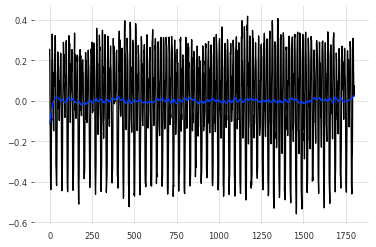

In [12]:
from dca import DynamicalComponentsAnalysis as DCA

dca_model = DCA(d=2, T=30)
# oracle DCA: select the timescale we know to be optimal
dca_vals = dca_model.fit_transform(vals_response)
plt.plot(dca_vals[:, 0])
from scipy.signal import savgol_filter
plt.plot(savgol_filter(dca_vals[:, 0], 131, 3))

Current Time:  21:33:51
Current Time:  21:33:51
Computing distance matrix... 

/Users/williamgilpin/program_repos/ndyn/models.py:802: UserWarning: 6 Constant time series detected. Skipping these datasets.
  warnings.warn(f"{np.sum(sel_inds)} Constant time series detected. "


Current Time:  21:36:21
done.
Current Time:  21:36:21
Matrix sparsity is:  0.9900000685871057
Current Time:  21:36:21
Assigning pseudotime labels.
....................

Current Time:  21:38:51


Text(0.5, 1.0, 'PCA vs True')

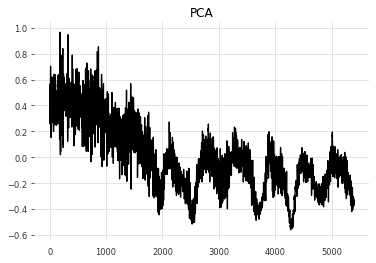

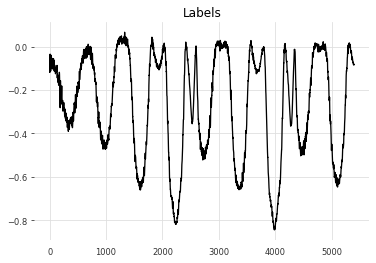

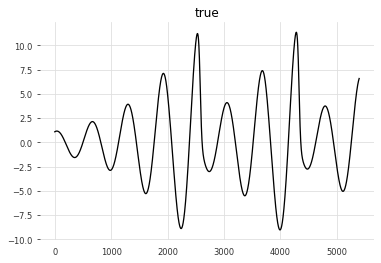

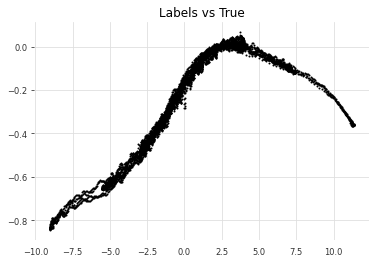

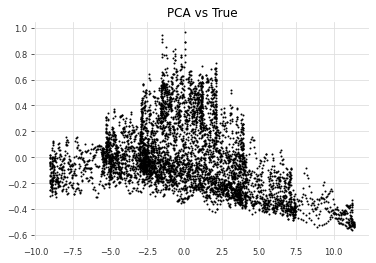

In [23]:
# vals_response = X_measure.T
true_data =  X_measure.T
true_driver0 = sol_drive[:, 0].T

from sklearn.decomposition import PCA
embedding = PCA()
pca_vals = embedding.fit_transform(true_data)[:, 0]


model = RecurrenceManifold(random_state=0, scale=np.log(2))

curr_time()
label_vals0 = model.fit_predict(true_data)
curr_time()


plt.figure()
plt.plot(pca_vals, 'k')
plt.title("PCA")

plt.figure()
plt.plot(label_vals0, 'k')
plt.title("Labels")

plt.figure()
plt.plot(true_driver0, 'k')
plt.title("true")

plt.figure()
plt.plot(true_driver0, label_vals0, '.k', markersize=2)
plt.title("Labels vs True")


plt.figure()
plt.plot(true_driver0, pca_vals, '.k', markersize=2)
plt.title("PCA vs True")


Current Time:  20:17:01
Current Time:  20:17:01
Computing distance matrix... 

/Users/williamgilpin/program_repos/ndyn/models.py:802: UserWarning: 5 Constant time series detected. Skipping these datasets.
  warnings.warn(f"{np.sum(sel_inds)} Constant time series detected. "


Current Time:  20:17:18
done.
Current Time:  20:17:18
Matrix sparsity is:  0.9900006172839506
Current Time:  20:17:18
Assigning pseudotime labels.
....................

Current Time:  20:17:33


Text(0.5, 1.0, 'Embedding vs response variable')

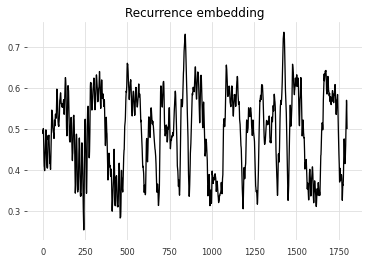

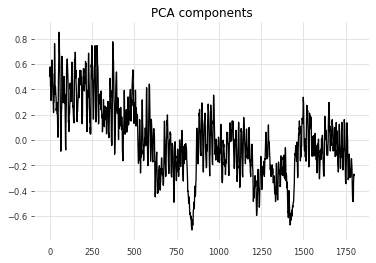

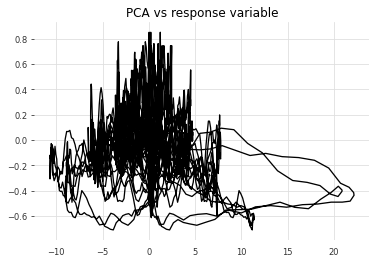

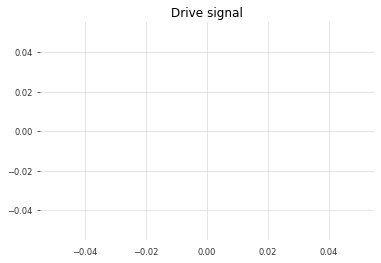

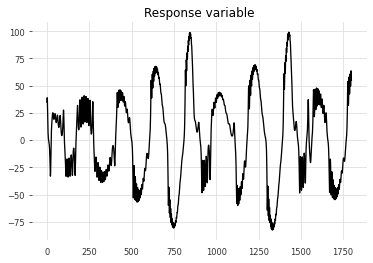

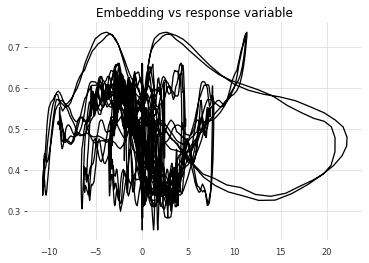

In [6]:
vals_response = X_measure.T
# true_data =  X_measure.T
# true_driver = sol_drive[:, 0].T

# model = RecurrenceManifold(weighted_connectivity=True, store_adjacency_matrix=False, random_state=0, use_sparse=True)
model = RecurrenceManifold(random_state=0)


# # model = RecurrenceClustering(weighted_connectivity=True)
# # model = RecurrenceClustering(weighted_connectivity=True, merge="kmin")

curr_time()
label_vals = model.fit_predict(true_driver)
curr_time()

n_plt = 1700

plt.figure()
plt.plot(label_vals, 'k')
plt.title("Recurrence embedding")

plt.figure()
from sklearn.decomposition import PCA
data_transformed = PCA().fit_transform(X_measure.T)
plt.plot(data_transformed[:, 0]);
plt.title("PCA components")

plt.figure()
plt.plot(sol_drive, data_transformed[:, 0], 'k', markersize=1)
plt.title("PCA vs response variable")

plt.figure()
plt.plot(sol_drive[: 0], 'k')
plt.title("Drive signal")

plt.figure()
plt.plot(sol_response[0, :, 0], 'k')
plt.title("Response variable")

plt.figure()
plt.plot(sol_drive, label_vals, 'k', markersize=1)
plt.title("Embedding vs response variable")

# Discrete-time examples

In [ ]:
## test: try burying a signal in noise

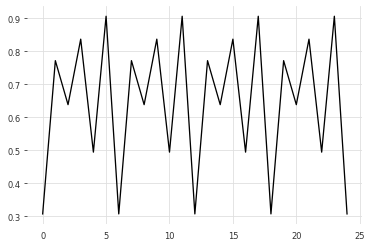

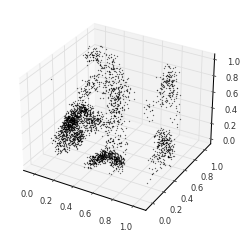

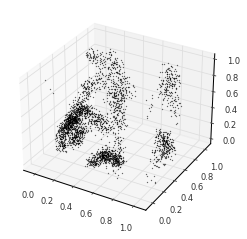

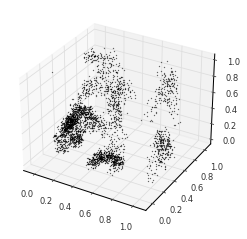

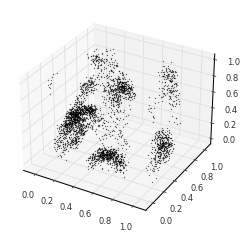

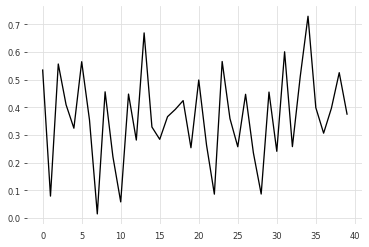

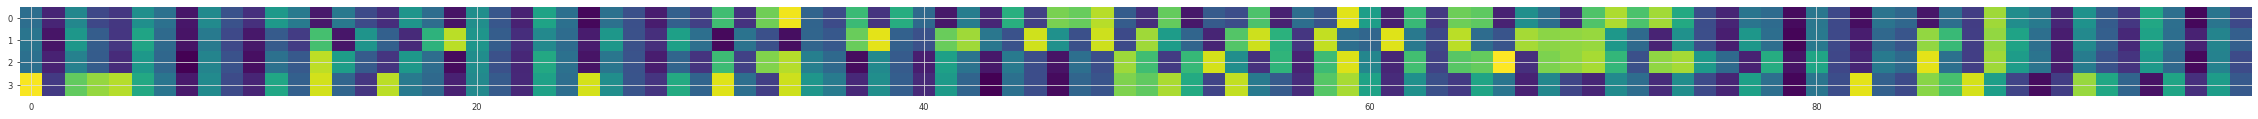

In [ ]:
# neighbors ~ eps^3
# noise ~ neighbors ?
# noise ~ eps


# k_neighbors = 5
# volume_eps = (4/3) * np.pi * eps**3
# local_dist = np.mean(np.sort(dist_mat_min, axis=0)[:k_neighbors])
# point_density = k_neighbors / (4/3) * np.pi * local_dist**3
# expected_neighbors = point_density * volume_eps

# noise_distance = 0.1
# volume_noise = (4/3) * np.pi * noise_distance**3


# def xn(x, d, lam=np.array([3.77, 3.775, 3.78, 3.785, 3.795])):
#     return np.mod((lam * x * (1 - x) + 0.5 * d), 1.0)

# def valnext(x, d, lam0=3.6266):
#     dn_val = lam0 * d * (1 - d)
#     xn_val = xn(x, d)
#     return xn_val, dn_val
np.random.seed(0)
curr = (np.random.random(5), 0.5)

lamvals = np.array([3.81, 3.82, 3.83, 3.84+.04, 3.87, 3.865, 3.8155, 3.8552, 3.8255])
lamvals = 3.81 + np.random.random(30) * 0.08
lamvals = 3.81 + np.random.random(4) * 0.08
def xn(x, d, lam=lamvals):
    return np.mod((lam * x * (1 - x) + 0.45 * d), 1.0)
            
# def valnext(x, d, lam0=3.835):
def valnext(x, d, lam0=3.6266):
    dn_val = lam0 * d * (1 - d)
    xn_val = xn(x, d)
    return xn_val, dn_val
np.random.seed(0)
curr = (np.random.random(len(lamvals)), 0.5)



# def xn(x, d, a1=3.2, b1=0.1, a2=0.1, b2=0.1):
#     x1n = a1 * x[0] * (1 - x[0]) + b1
#     x2n = np.mod(a2 * np.sin(6 * np.pi * x[1]) + x[1] + 1/3+ b2 * x[0], 1)
#     return np.array([x1n, x2n])

# def valnext(x, d, w=0.06*2*np.pi):
#     dn_val = np.mod(x + w, 1)
#     xn_val = xn(x, d)
#     return xn_val, dn_val
# np.random.seed(0)
# curr = (0.1*np.random.random(2), 0.5)

vals = [curr]
for i in range(3200):
    curr = valnext(*curr)
    vals.append(curr)
# vals = np.array(vals)[200:]
vals_drive = np.array([item[1] for item in vals])[200:]
vals_response = np.array([item[0] for item in vals])[200:, :]
vals_response += (np.random.random(vals_response.shape) - 0.5)*0.1

## Make reconstructions with m = 3
m = 3
all_attractors = list()
for row in vals_response.T:
    embedding = list()
    for i in range(m):
        embedding.append(row[i : i - m])
    embedding = np.vstack(embedding).T
    all_attractors.append(embedding)
all_attractors = np.array(all_attractors)

## Plot attractors

plt.figure()
plt.plot(vals_drive[-25:])

for attractor in all_attractors:
    plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot3D(attractor[:, 0], attractor[:, 1], attractor[:, 2], '.k', markersize=0.5)

    
plt.figure()
plt.plot(np.mean(vals_response, axis=-1)[:40])

plt.figure(figsize=(40, 2))
plt.imshow(vals_response[:100].T)

In [ ]:


known_items = list()
item_labels = list()

for item in merged_inds:
    i = 0
    add_flag = False
    for j, known_item in enumerate(known_items):
        if allclose_len(item, known_item):
            item_labels.append(j)
            add_flag = True
    if not add_flag:
        known_items.append(item)
        item_labels.append(i + 1)
item_labels = np.array(item_labels)


NameError: name 'merged_inds' is not defined

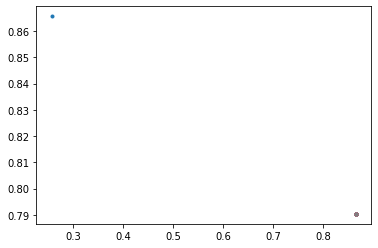

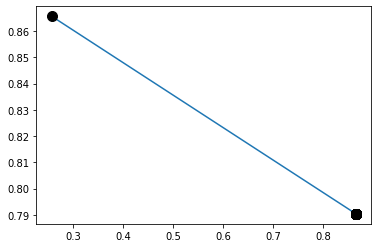

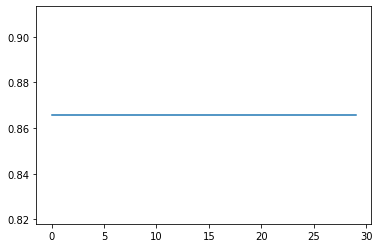

In [ ]:
class_example = list()
plt.figure()
for label in item_labels:

    #plt.plot(*reference_attractor[item_labels==label].T[:2], '.')

    plt.plot(*reference_attractor[item_labels==label].T[:2, 0], '.')
    class_example.append(reference_attractor[item_labels==label][0])
class_example = np.array(class_example)


## Plot results

plt.figure()
plt.plot(class_example[:, 0], class_example[:, 1])
plt.plot(class_example[:, 0], class_example[:, 1], '.k', markersize=20)

plt.figure()
plt.plot(class_example[5:35, 0])

In [ ]:
  
model = RecurrenceClustering(resolution=1.0, tolerance=0.01)
label_vals = model.fit_predict(vals_response)
# label_vals = model.fit(vals_response, use_sparse=True).predict(vals_response)
vals_recon = model.get_driving(vals_response)
vals_embedded = model.transform(vals_response)


n_plt = 30

plt.figure()
plt.plot(label_vals[:n_plt],'-k')
plt.plot(label_vals[:n_plt],'.k')

plt.figure()
plt.plot(sol_response[0, :n_plt, 0],'-k')

plt.figure()
plt.plot(sol_drive[:n_plt,0],'-k')

plt.figure()
plt.plot(sol_drive[:n_plt, 0], label_vals[:n_plt], 'k')

distance shape: (4, 2998, 3)
asymmetry acc:  0.0
asymmetry:  0


/Users/williamgilpin/miniconda3/envs/ndyn/lib/python3.8/site-packages/graspologic/partition/leiden.py:354: UserWarning: Leiden partitions do not contain all nodes from the input graph because input graph contained isolate nodes.
  warnings.warn(


AttributeError: 'NoneType' object has no attribute 'predict'

Selected threshold is 0.006170946906036179
Distance matrix sparsity is is 0.990000005633447


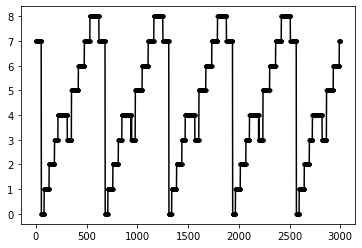

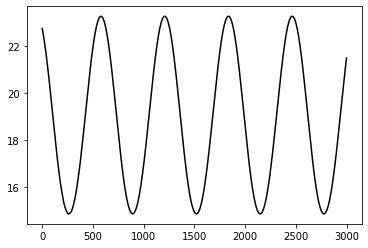

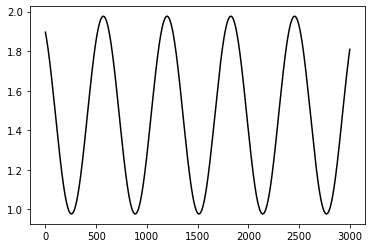

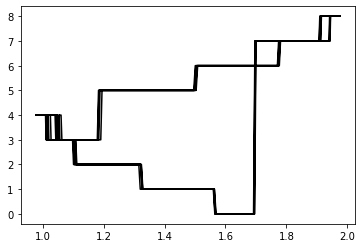

In [7]:

vals_response = X_measure.T
    
model = RecurrenceClustering(resolution=1.0, tolerance=0.01)
label_vals = model.fit_predict(vals_response)
# label_vals = model.fit(vals_response, use_sparse=True).predict(vals_response)
vals_recon = model.get_driving(vals_response)
vals_embedded = model.transform(vals_response)


n_plt = 3000

plt.figure()
plt.plot(label_vals[:n_plt],'-k')
plt.plot(label_vals[:n_plt],'.k')

plt.figure()
plt.plot(sol_response[0, :n_plt, 0],'-k')

plt.figure()
plt.plot(sol_drive[:n_plt,0],'-k')

plt.figure()
plt.plot(sol_drive[:n_plt, 0], label_vals[:n_plt], 'k')

In [ ]:

def fread(fid, nelements, dtype):
    if dtype is str:
        dt = np.uint8  # WARNING: assuming 8-bit ASCII for np.str!
    else:
        dt = dtype

    data_array = np.fromfile(fid, dt, nelements)
    data_array.shape = (nelements, 1)

    return data_array

fpath = "data/1.bin"
with open(fpath, 'rb') as fid:
    fs = fread(fid, 1, '<f8')
    rows = fread(fid, 1, '<u8')
    cols = fread(fid, 1, '<f8')
    data = np.fromfile(fid, dtype='<f8')

if int(rows * cols) == int(np.prod(data.shape)):
    data = np.reshape(data, (int(cols), int(rows)))

In [157]:
true_data = np.load("data_elec.pkl", allow_pickle=True)
ranked_by_missing = np.argsort(np.sum(true_data == 0, axis=0))
true_data = true_data[:, ranked_by_missing[:10]]

Selected threshold is 0.0822153493505287
Distance matrix sparsity is is 0.9900000144346223


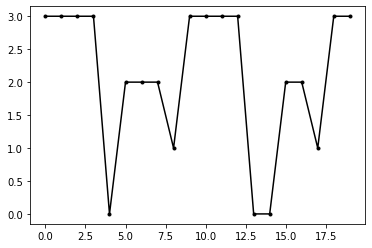

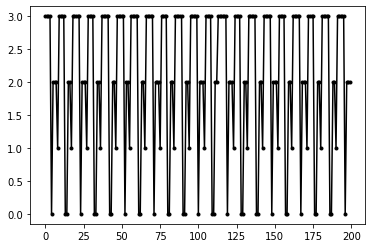

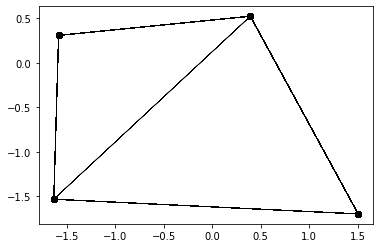

In [173]:
from scipy.signal import savgol_filter

# true_data = np.load("test2.pkl", allow_pickle=True).T
# true_data = np.load("test3.pkl", allow_pickle=True)[:, :10][::3, :]
# true_data = np.load("test4.pkl", allow_pickle=True)[:10000, :20]

# true_data = np.load("test4.pkl", allow_pickle=True)
# highest_variance = np.argsort(np.var(true_data, axis=0))[::-1]
# # true_data = true_data[:5000, highest_variance]
# true_data = true_data[::10][:4000, highest_variance[:5]]

# from sklearn.decomposition import PCA
# true_data = np.load("test4.pkl", allow_pickle=True)
# embedding = PCA()
# data_transformed = embedding.fit_transform(true_data)
# true_data = data_transformed[::1][:4000, :10]

# ## Interpeak distance
# from scipy.signal import find_peaks
# true_data = np.load("test4.pkl", allow_pickle=True)
# highest_variance = np.argsort(np.var(true_data, axis=0))[::-1][:10]
# true_data = true_data[:, highest_variance]
# all_inds = list()
# for row in true_data.T:
#     all_inds.append(np.diff(find_peaks(row)[0]))
# min_len = min([len(item) for item in all_inds])
# true_data = np.vstack([item[:min_len] for item in all_inds]).T


## Natal ECG data
# data_trend = savgol_filter(data, 1001, 3, axis=0)
# data_detrended = data - data_trend
# true_data = data_detrended[::6][:5000, :20]

# model = RecurrenceClustering(d_embed=3, resolution=1.0)
# model.fit(true_data)
# traj = model.transform(true_data)


true_data = np.load("data_elec.pkl", allow_pickle=True)
ranked_by_missing = np.argsort(np.sum(true_data == 0, axis=0))
true_data = true_data[::10][:2500, ranked_by_missing[:20]]

model = RecurrenceClustering(d_embed=3, resolution=1.0)
model.fit(true_data)
traj = model.transform(true_data)


plt.figure()
plt.plot(model.labels_[:20],'-k')
plt.plot(model.labels_[:20],'.k')

plt.figure()
plt.plot(model.labels_[:200],'-k')
plt.plot(model.labels_[:200],'.k')

plt.figure()
plt.plot(traj[0, :, 0], traj[0, :, 2], '.k', markersize=10)
plt.plot(traj[0, :, 0], traj[0, :, 2], 'k', linewidth=0.4)

## summer to fall seasonal transition over 93 days. 23 July to 23 October, 2010

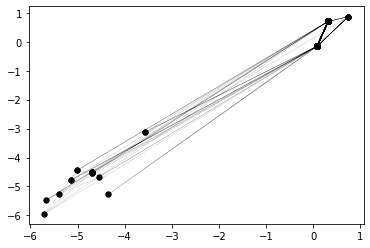

In [ ]:
plt.figure()
plt.plot(traj[0, :, 0], traj[0, :, 2], '.k', markersize=10)
plt.plot(traj[0, :, 0] + 0.005 * np.random.normal(size=traj[0, :, 0].shape), 
         traj[0, :, 2] + 0.005 * np.random.normal(size=traj[0, :, 0].shape), 
         'k', linewidth=0.1)
# plt.xlim([-0.25, 0.6])
# plt.ylim([-0.3, 0.6])

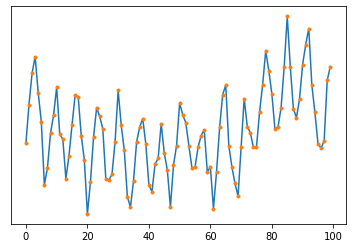

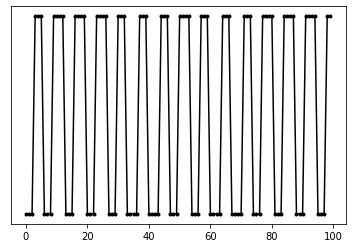

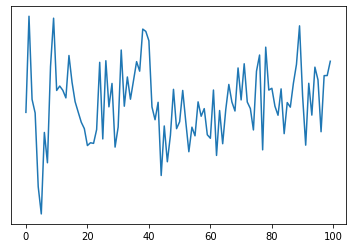

In [107]:
tlen = 100
plt.figure()
plt.plot(data_detrended[::6][:tlen, 1], '-')
plt.plot(data_detrended[::6][:tlen, 1], '.')
# plt.plot(data_detrended[::10][:tlen, 5])
plt.gca().axes.get_yaxis().set_visible(False)

plt.figure()
plt.plot(model.labels_[:tlen],'-k')
plt.plot(model.labels_[:tlen],'.k')
plt.gca().axes.get_yaxis().set_visible(False)

plt.figure()
plt.plot(data_detrended[::10][:tlen, -3])
plt.gca().axes.get_yaxis().set_visible(False)



# Period-doubling cascade

# Work with continuous-time chaotic system

Consider Fitzhugh-Nagumo example

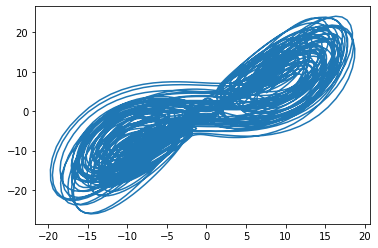

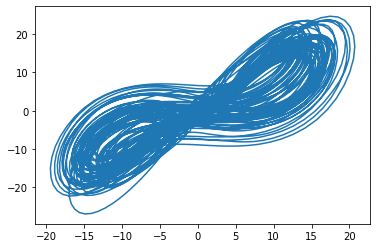

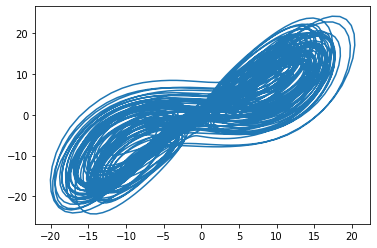

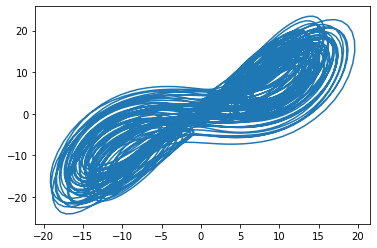

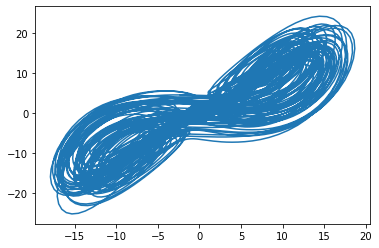

In [90]:
nval = 5

np.random.seed(0)
def lorenz_follower(t, X, 
                    n=nval, 
                    beta=2.667,
                    rho=28 * (1 + 0.1 * (2 * np.random.random(nval) - 1)),
                    sigma=10 * (1 + 0.1 * (2 * np.random.random(nval) - 1)),
                    k = 1 * (1 + 0*(2 * np.random.random(nval) - 1)),
                    omega=2 * np.pi
                   ):
    x, y, z, w = X[:n], X[n:2*n], X[2*n:3*n], X[-1]
    
    wdot = omega * np.cos(omega * t)
    xdot = sigma * (y - x) + 40 * k * w
    ydot = x * (rho - z) - y 
    zdot = x * y - beta * z 
    out = np.hstack([xdot, ydot, zdot, wdot])
    return out

from scipy.integrate import solve_ivp


tpts = np.linspace(0, 100, 10000)
ic = np.random.random(3 * nval + 1)
ic[-1]=0


sol = solve_ivp(lorenz_follower, [min(tpts), max(tpts)], ic, t_eval=tpts[int(0.1*len(tpts)):])
solx, soly, solz, solw = sol.y[:nval], sol.y[nval:2*nval], sol.y[2*nval:3*nval], sol.y[-1]
all_sol = np.dstack([solx, soly, solz])
tvals = sol.t

 # B, T, D
for sol in all_sol:
    plt.figure()
    plt.plot(sol[:, 0], sol[:, 1])

Selected threshold is 0.19217636790590942
Distance matrix sparsity is is 0.950000158870873


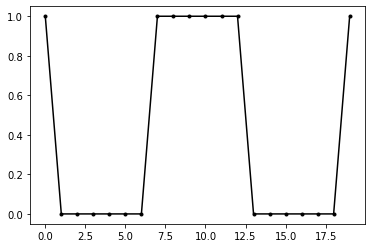

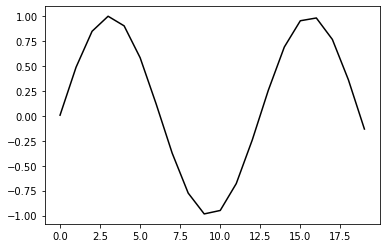

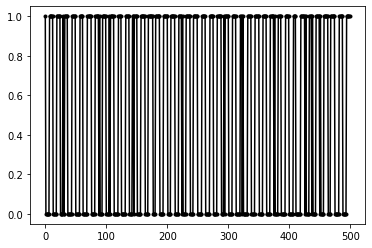

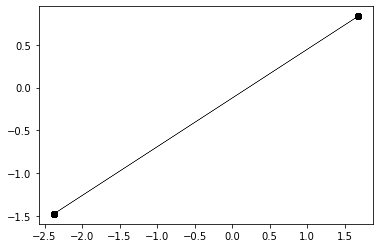

In [101]:
vals_response = np.copy(all_sol[..., 1].T)[::8]
vals_driving =  np.copy(solw)[::8]

model = RecurrenceClustering(resolution=1.0, tolerance=0.05)
model.fit(vals_response, use_sparse=False)
vals_recon = model.get_driving(vals_response)
vals_embedded = model.transform(vals_response)

traj = model.transform(vals_response)

plt.figure()
plt.plot(model.labels_[:20],'-k')
plt.plot(model.labels_[:20],'.k')

plt.figure()
plt.plot(vals_driving[:20],'-k')

plt.figure()
plt.plot(model.labels_[:500],'-k')
plt.plot(model.labels_[:500],'.k')

plt.figure()
plt.plot(traj[0, :, 0], traj[0, :, 2], '.k', markersize=10)
plt.plot(traj[0, :, 0], traj[0, :, 2], 'k', linewidth=0.4)

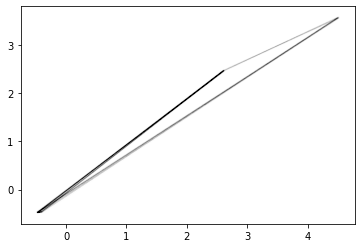

In [ ]:
plt.plot(traj[0, :, 0] + 0.01*np.random.normal(size=traj[0, :, 0].shape), 
         traj[0, :, 2] + 0.01*np.random.normal(size=traj[0, :, 0].shape), 
         'k', linewidth=0.001)

In [ ]:
np.mean(np.exp(-np.ones(8) / np.log(8)))

0.618227759238147

In [ ]:
np.mean(np.exp(-np.ones(5)))

# Experimental Datasets

## Worm neurons Kato et al

From [here](https://osf.io/y8a6e/)

In [ ]:
# dpath = "/Users/williamgilpin/Downloads/WT_NoStim.mat"
dpath = "/Users/williamgilpin/Downloads/WT_Stim.mat"


# from scipy.io.matlab import loadmat
# loadmat(dpath)

import h5py

# traces_raw
keyname = "WT_Stim"
with h5py.File(dpath, 'r') as f:
    print(f[keyname].keys())
   #true_driving = np.array(f[f[keyname]["States"][0][0]]) # these are based on the PCA, 
    m2 = f[keyname]["stimulus"][0][0]
    print(f[m2].keys())
    print(np.array(f[m2]['conc']))
    print(np.array(f[m2]['identity']))
#     print(np.array(f[m2]['identity']))
    true_driving = np.squeeze(np.array(f[m2]['switchtimes']))
#     print(f[keyname]["stimulus"][0])

    
    m1 = f[keyname]["traces_raw"][0][0]
    print("\n", m1)
    data = np.array(f[m1])
    tpts =np.squeeze(np.array(f[f[keyname]["timeVectorSeconds"][0][0]]))
    
true_data = data.T


model = RecurrenceManifold(random_state=0) 
label_vals = model.fit_predict(true_data)

pca_vals = PCA().fit_transform(true_data)

plt.figure()
plt.plot(label_vals[:], 'k')


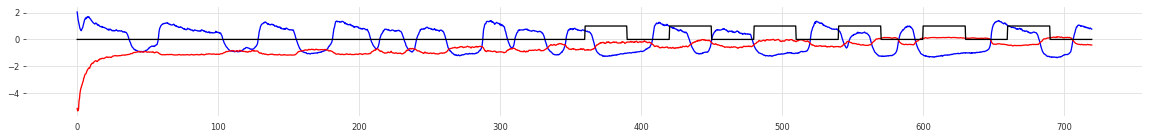

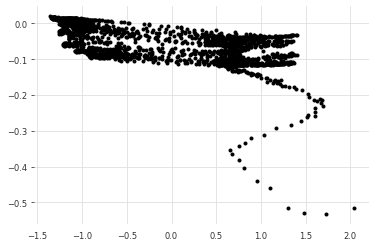

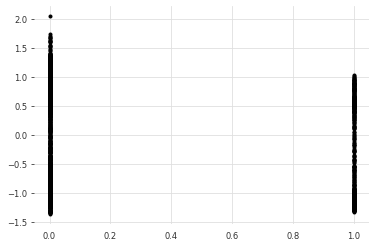

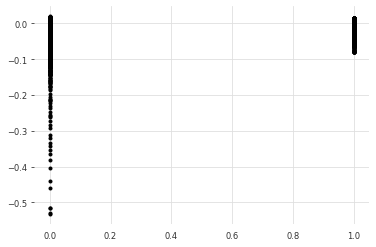

In [520]:
sig = np.zeros_like(tpts)
for bkpt in true_driving:
    sig[tpts > bkpt] = 1 - sig[tpts > bkpt]


plt.figure(figsize=(20, 2))
plt.plot(tpts, pca_vals[:, 0], 'b')
plt.plot(tpts, 10*label_vals, 'r')
plt.plot(tpts, sig, 'k')

plt.figure()
plt.plot(pca_vals[:, 0], label_vals, '.k')

plt.figure()
plt.plot(sig, pca_vals[:, 0], '.k')

plt.figure()
plt.plot(sig, label_vals, '.k')

# Rat hippocampus

In [120]:
neurons, positions = np.load("/Users/williamgilpin/Downloads/example_data_hc.pickle", allow_pickle=True)
true_data = neurons[200:][4000:][:3000]
true_driver0 = positions[200:][4000:][:3000, 0]
true_driver0 = nan_fill(true_driver0)

In [179]:
neurons, positions = np.load("/Users/williamgilpin/Downloads/example_data_m1.pickle", allow_pickle=True)
true_data = neurons[::1, :][:3000]
true_driver0 = positions[::1][:3000, 0]
true_driver0 = nan_fill(true_driver0)

# true_data = savgol_filter(true_data, 201, 3, axis=0)
# true_driver0 = savgol_filter(true_driver0, 101, 3, axis=0)
from scipy.ndimage import gaussian_filter1d
from scipy.signal import medfilt
true_data = gaussian_filter1d(true_data, 21, axis=0)
true_driver0 = gaussian_filter1d(true_driver0, 21)

# true_data = medfilt(true_data, kernel_size=(121, 1))
# true_driver0 = medfilt(true_driver0, 121)

# true_data = np.hstack([true_data, np.random.random(true_data.shape), np.random.random(true_data.shape)])
# true_data = standardize_ts(true_data)
# true_data = detrend_ts(true_data)
# true_driver0 = np.squeeze(detrend_ts(true_driver0[:, None]))

In [146]:
neurons, positions = np.load("/Users/williamgilpin/Downloads/example_data_s1.pickle", allow_pickle=True)

# true_data = neurons[400:][:3000]
# true_driver = positions[400:][:3000, 0]

# true_data = neurons[420:][:3000]
# true_driver = positions[420:][:3000, 0]


true_data = neurons[400:][:3000]
true_driver0 = positions[400:][:3000, 0]

true_driver0 = nan_fill(true_driver0)


# true_data = detrend_ts(true_data)
# true_driver0 = np.squeeze(detrend_ts(true_driver0[:, None]))

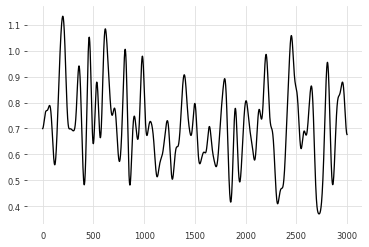

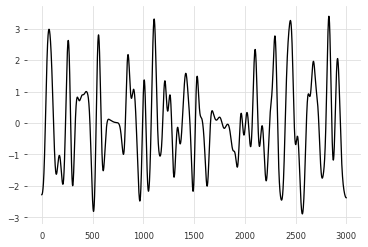

In [180]:
plt.figure()
plt.plot(true_data[:, 0])

plt.figure()
plt.plot(true_driver0)

Current Time:  13:23:24
Current Time:  13:23:24
Computing distance matrix... 

/Users/williamgilpin/program_repos/ndyn/models.py:802: UserWarning: 1 Constant time series detected. Skipping these datasets.
  warnings.warn(f"{np.sum(sel_inds)} Constant time series detected. "


Current Time:  13:23:56
done.
Current Time:  13:23:56
Matrix sparsity is:  0.9900002222222222
Current Time:  13:23:56
Assigning pseudotime labels.
....................

Current Time:  13:24:32


Text(0.5, 1.0, 'true')

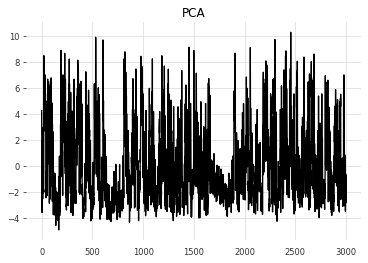

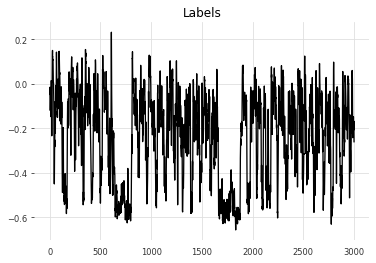

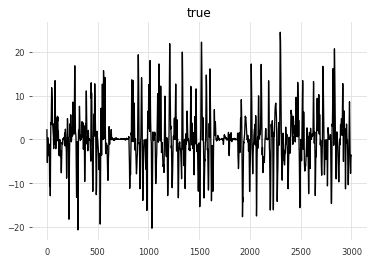

In [171]:
true_data = detrend_ts(true_data)
true_driver = np.squeeze(detrend_ts(true_driver[:, None]))

from sklearn.decomposition import PCA
embedding = PCA()
data_pca = embedding.fit_transform(true_data)[:, 0]

model = RecurrenceManifold(random_state=0) 

curr_time()
label_vals0 = model.fit_predict(true_data)
curr_time()


plt.figure()
plt.plot(data_pca, 'k')
plt.title("PCA")

plt.figure()
plt.plot(label_vals0, 'k')
plt.title("Labels")

plt.figure()
plt.plot(true_driver0, 'k')
plt.title("true")

Current Time:  04:00:10
Current Time:  04:00:10
Computing distance matrix... 

/Users/williamgilpin/program_repos/ndyn/models.py:802: UserWarning: 1 Constant time series detected. Skipping these datasets.
  warnings.warn(f"{np.sum(sel_inds)} Constant time series detected. "


Current Time:  04:00:39
done.
Current Time:  04:00:39
Matrix sparsity is:  0.9900002222222222
Current Time:  04:00:39
Assigning pseudotime labels.
....................

Current Time:  04:01:20


Text(0.5, 1.0, 'true')

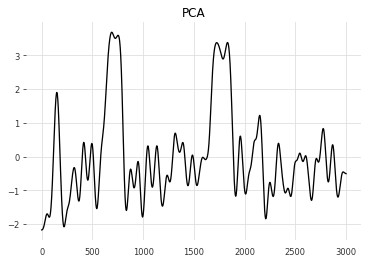

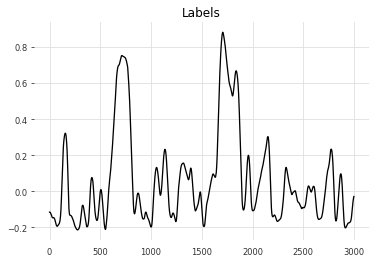

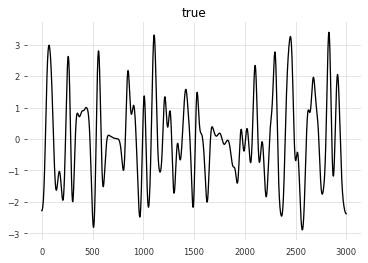

In [181]:
true_data = detrend_ts(true_data)
true_driver = detrend_ts(true_driver0)

from sklearn.decomposition import PCA
embedding = PCA()
data_pca = embedding.fit_transform(true_data)[:, 0]


# model = RecurrenceManifold(random_state=0, detrend=True, n_samples_pseudotime=100) 
# check stadardization here
model = RecurrenceManifold(random_state=0)

curr_time()
label_vals0 = model.fit_predict(true_data)
curr_time()


plt.figure()
plt.plot(data_pca, 'k')
plt.title("PCA")

plt.figure()
plt.plot(label_vals0, 'k')
plt.title("Labels")

plt.figure()
plt.plot(true_driver0, 'k')
plt.title("true")

0.11 mutual_info
0.46 conditional_info
0.89 conditional_info_back
1.03 mae
2177.6 mape
22.14 marre
1.7 mse
-0.7 r2_score
1.31 rmse
131.19 smape
-0.27 spearman
-0.15 pearson
-0.16 kendalltau
0.46 sync
0.04 coherence
0.21 coherence_phase
0.24 cross forecast error
0.46 cross forecast error neural
0.32 cross forecast error neural 2


0.12 mutual_info
0.57 conditional_info
0.86 conditional_info_back
1.0 mae
2173.75 mape
21.67 marre
1.66 mse
-0.66 r2_score
1.29 rmse
131.04 smape
-0.29 spearman
-0.17 pearson
-0.18 kendalltau
0.43 sync
0.03 coherence
0.26 coherence_phase
0.15 cross forecast error
0.3 cross forecast error neural
0.43 cross forecast error neural 2




Text(0.5, 1.0, 'Labels vs PCA: 0.8911823936869325 0.0')

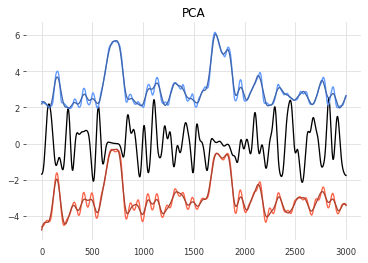

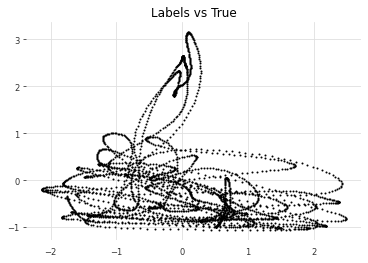

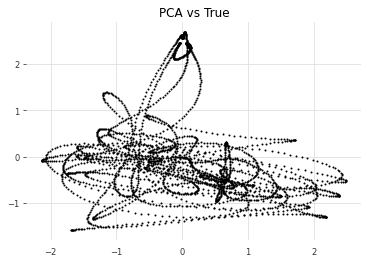

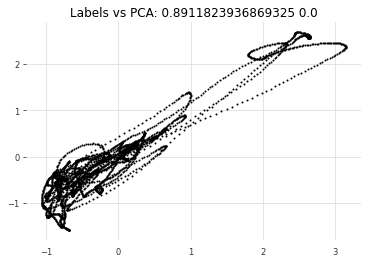

In [182]:
import degas as dg
from scipy.signal import savgol_filter
from scipy.stats import spearmanr

true_driver = standardize_ts(true_driver0)
label_vals = standardize_ts(label_vals0)
pca_vals = standardize_ts(data_pca)

# sort_inds = np.argsort(true_driver)
# true_driver = true_driver[sort_inds]
# label_vals = label_vals[sort_inds]
# pca_vals = pca_vals[sort_inds]

## derivatives
# true_driver = standardize_ts(np.diff(true_driver0))
# label_vals =  standardize_ts(np.diff(nan_fill(label_vals0)))
# pca_vals = standardize_ts(np.diff(data_pca))

# label_vals = savgol_filter(label_vals, 131, 3)
# pca_vals = savgol_filter(pca_vals, 131, 3)
# true_driver = 10 * savgol_filter(true_driver, 131, 3)

# label_vals = standardize_ts(savgol_filter(label_vals0, 11, 3, deriv=1))
# pca_vals = standardize_ts(savgol_filter(data_pca, 11, 3, deriv=1))
# true_driver = standardize_ts(savgol_filter(true_driver0, 11, 3, deriv=1))

# pca_vals = np.random.random(pca_vals.shape)

plt.figure()
plt.plot(true_driver, 'k')
plt.title("True")

# plt.figure()
plt.plot(3 + label_vals, color=dg.blue)
plt.plot(savgol_filter(3 + label_vals, 131, 3), color=dg.darker(dg.blue))
# plt.plot(np.cumsum(label_vals - np.mean(label_vals)))
plt.title("Labels")

# plt.figure()
plt.plot(-3 + pca_vals, color=dg.red)
plt.plot(savgol_filter(-3 + pca_vals , 131, 3), color=dg.darker(dg.red))
plt.title("PCA")




plt.figure()
plt.plot(true_driver, label_vals, '.k', markersize=2)
print_dict(score_ts(true_driver, label_vals))
plt.title("Labels vs True")


plt.figure()
plt.plot(true_driver, pca_vals, '.k', markersize=2)
print_dict(score_ts(true_driver, pca_vals))
plt.title("PCA vs True")

plt.figure()
plt.plot(label_vals, pca_vals, '.k', markersize=2)
corr = spearmanr(label_vals, pca_vals)
plt.title("Labels vs PCA: " + str(corr.correlation) + " " + str(corr.pvalue))


In [18]:
all_label_scores, all_pca_scores = list(), list()
ts = 500
keyname = "mutual_info"
keyname = "spearman" # no detrending
for i in np.random.choice(np.arange(len(true_driver) - ts), 30, replace=False):
    scores = score_ts(true_driver[i:i+ts], label_vals[i:i+ts])
    all_label_scores.append(scores[keyname])

    scores = score_ts(true_driver[i:i+ts], pca_vals[i:i+ts])
    all_pca_scores.append(scores[keyname])
    
print(np.mean(all_label_scores), np.std(all_label_scores))
print(np.mean(all_pca_scores), np.std(all_pca_scores))

0.14797713270853083 0.1693793435872174
0.2041101924407697 0.12286370632224286


# Mouse head direction

[Source](https://portal.nersc.gov/project/crcns/download/th-1/data)

Similar dataset [here](https://crcns.org/data-sets/hc/hc-2)

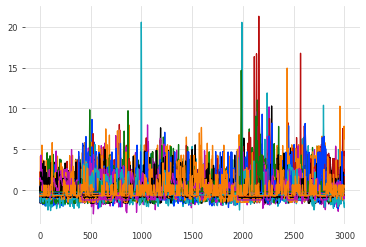

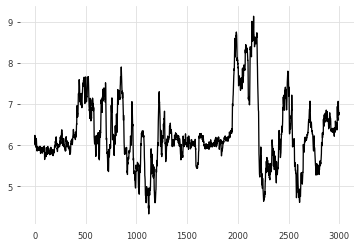

In [72]:

from scipy.signal import savgol_filter
from utils import load_pickle_file

data_dir = "/Users/williamgilpin/Dropbox (Personal)/attractor/code/resources/analyses/2019_03_kernel_rates/100ms_sigma/Mouse28-140313.p"
d = load_pickle_file(data_dir)

all_recordings = list()
for key in d['Wake'][(5565.0,7851.4)]["rates"]:
    
    all_recordings.append( d['Wake'][(5565.0,7851.4)]["rates"][key])
    
#     all_recordings.append(
#         savgol_filter(
#             d['Wake'][(5565.0,7851.4)]["rates"][key],
#             61,
#             3
#         )
#     )
    
    


# true_data = np.vstack(all_recordings)[:, :3000].T
# true_data = standardize_ts(true_data)
# true_driver = d['Wake'][(5565.0,7851.4)]["angles"][:3000]
# true_driver = unroll_phase(nan_fill(true_driver))

true_data = np.vstack(all_recordings)[:, :].T[200:][:3000]
true_data = standardize_ts(true_data)
true_driver0 = d['Wake'][(5565.0,7851.4)]["angles"][200:][:3000]
true_driver0 = unroll_phase(nan_fill(true_driver0))

plt.figure()
plt.plot(true_data);

#np.vstack(true_data.dump("test_head_direction_neurons.pkl")

plt.figure()
plt.plot(true_driver0)



(5313240000,)
(59036000, 90)
(775980,)
76.07928039382459


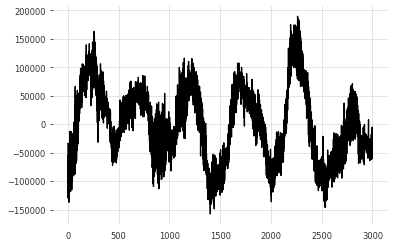

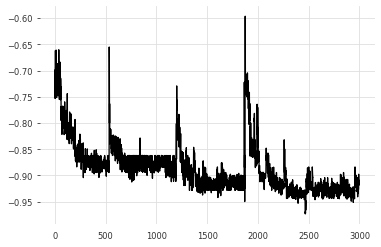

In [168]:

# n_channels = 96 # in XML file
# n_channels = 90 # in XML file


# raw_signal = np.loadtxt("/Users/williamgilpin/Downloads/AngFiles/Mouse12-120810.ang")
# raw_signal[raw_signal == -1] = None
# true_signal = unroll_phase(nan_fill(raw_signal))
# true_signal = true_signal[::100][:2000][25:]


# mouse_name = "Mouse12-120810"
# dpath = "/Users/williamgilpin/Downloads/Mouse12-120810-01.dat"
# n_channels = 96 # in XML file
# dpath = "/Users/williamgilpin/Downloads/Mouse12-120810/" + mouse_name + ".eeg"
# raw_signal = np.loadtxt("/Users/williamgilpin/Downloads/AngFiles/" + mouse_name + ".ang")
# n_channels = 90 # in XML file

# mouse_name = "Mouse28-140313"
# dpath = "/Users/williamgilpin/Downloads/" + mouse_name + "/" + mouse_name  + ".eeg"
# raw_signal = np.loadtxt("/Users/williamgilpin/Downloads/" + mouse_name + "/" + mouse_name + ".ang")
# n_channels = 96 # in XML file

dpath = "/Users/williamgilpin/Downloads/Mouse12-120810-01.dat"
raw_signal = np.loadtxt("/Users/williamgilpin/Downloads/AngFiles/Mouse12-120810.ang")
n_channels = 90 # in XML file


#  20kHz
with open(dpath, 'r') as f:
    a = np.fromfile(f, dtype=np.uint16) # bit depth in file
print(a.shape)
raw_data = np.reshape(a, (n_channels, -1), order="C").T
print(raw_data.shape)



raw_signal[raw_signal == -1] = None
raw_signal = np.sin(unroll_phase(nan_fill(raw_signal)))
print(raw_signal.shape)

# Downsample
dsamp = raw_data.shape[0]/raw_signal.shape[0]
print(dsamp)
from scipy.signal import resample
raw_data = raw_data[::int(np.round(dsamp)), :]

raw_data = raw_data[6000:][::15][:3000]
raw_signal = raw_signal[6000:][::15][:3000]
# raw_data = raw_data[19000:][::7][:12000]
# raw_signal = raw_signal[19000:][::7][:12000]
# raw_data = raw_data[3000:][::4][:6000]
# raw_signal = raw_signal[3000:][::4][:6000]

from sklearn.decomposition import PCA
embedding = PCA()
data_transformed = embedding.fit_transform(raw_data)

true_data = raw_data
true_driver = raw_signal

plt.figure()
plt.plot(data_transformed[:, 0])

plt.figure()
plt.plot(raw_signal)


Current Time:  15:43:47
Current Time:  15:43:47
Computing distance matrix... 

/Users/williamgilpin/program_repos/ndyn/models.py:802: UserWarning: 1 Constant time series detected. Skipping these datasets.
  warnings.warn(f"{np.sum(sel_inds)} Constant time series detected. "


Current Time:  15:43:58
done.
Current Time:  15:43:59
Matrix sparsity is:  0.9900002222222222
Current Time:  15:43:59
Assigning pseudotime labels.
....................

Current Time:  15:44:36


Text(0.5, 1.0, 'true')

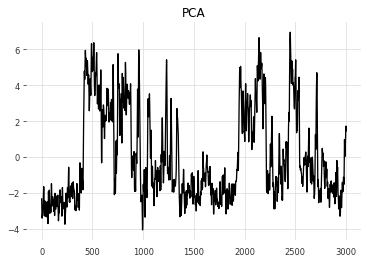

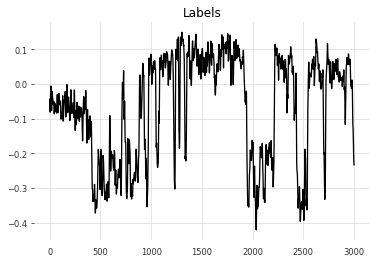

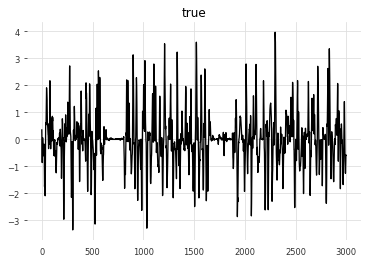

In [73]:
true_data = detrend_ts(true_data)
true_driver = np.squeeze(detrend_ts(true_driver[:, None]))

from sklearn.decomposition import PCA
embedding = PCA()
data_pca = embedding.fit_transform(true_data)[:, 0]


# model = RecurrenceManifold(random_state=0, detrend=True, n_samples_pseudotime=100) 
# check stadardization here
model = RecurrenceManifold(random_state=0)#, n_samples_pseudotime=100

curr_time()
label_vals0 = model.fit_predict(true_data)
curr_time()


plt.figure()
plt.plot(data_pca, 'k')
plt.title("PCA")

plt.figure()
plt.plot(label_vals0, 'k')
plt.title("Labels")

plt.figure()
plt.plot(true_driver, 'k')
plt.title("true")

0.16 mutual_info
0.43 conditional_info
0.53 conditional_info_back
0.67 mae
512.45 mape
11.24 marre
0.64 mse
0.36 r2_score
0.8 rmse
106.64 smape
-0.63 spearman
-0.68 pearson
-0.43 kendalltau
0.75 sync
0.1 coherence
0.87 coherence_phase
0.17 cross forecast error
0.17 cross forecast error neural
0.62 cross forecast error neural 2


0.13 mutual_info
0.59 conditional_info
0.66 conditional_info_back
0.7 mae
503.09 mape
11.73 marre
0.7 mse
0.3 r2_score
0.84 rmse
103.64 smape
0.54 spearman
0.65 pearson
0.35 kendalltau
0.72 sync
0.08 coherence
0.06 coherence_phase
0.15 cross forecast error
0.19 cross forecast error neural
0.63 cross forecast error neural 2




Text(0.5, 1.0, 'Labels vs PCA: -0.6730033579640401 0.0')

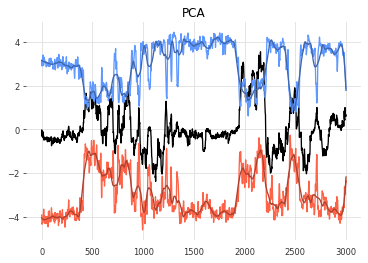

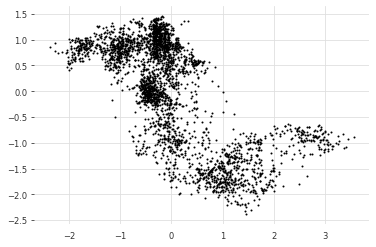

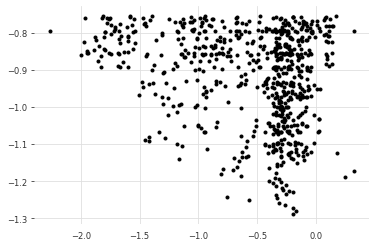

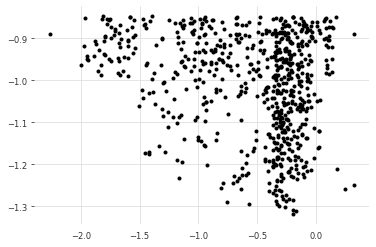

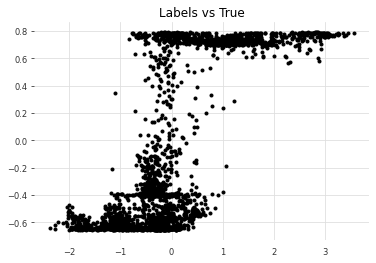

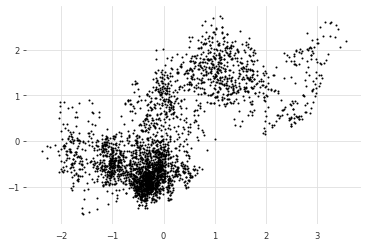

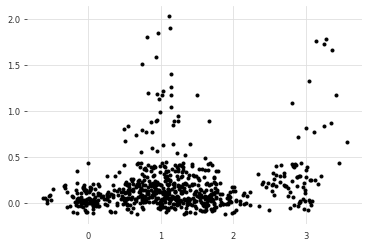

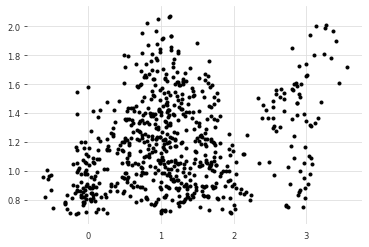

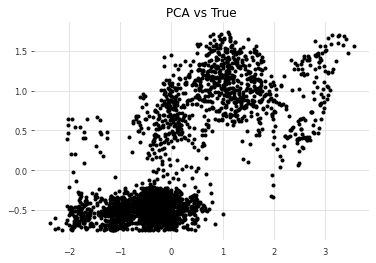

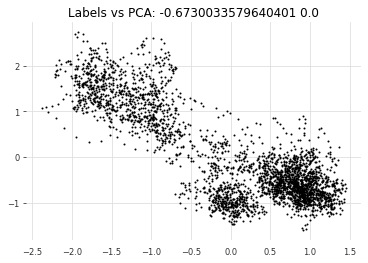

In [75]:
import degas as dg
from scipy.signal import savgol_filter

true_driver = standardize_ts(true_driver0)
label_vals = standardize_ts(label_vals0)
pca_vals = standardize_ts(data_pca)

## derivatives
# true_driver = np.squeeze(standardize_ts(np.diff(true_driver)[:, None]))
# label_vals = np.squeeze(standardize_ts(np.diff(nan_fill(label_vals0))[:, None]))
# pca_vals = np.squeeze(standardize_ts(np.diff(data_pca)[:, None]))

# label_vals = savgol_filter(label_vals, 131, 3)
# pca_vals = savgol_filter(pca_vals, 131, 3)

# label_vals = savgol_filter(label_vals0, 41, 3, deriv=1)
# pca_vals = savgol_filter(data_pca, 41, 3, deriv=1)
# true_driver = savgol_filter(true_driver0, 41, 3, deriv=1)



plt.figure()
plt.plot(true_driver, 'k')
plt.title("True")

# plt.figure()
plt.plot(3 + label_vals, color=dg.blue)
plt.plot(savgol_filter(3 + label_vals, 131, 3), color=dg.darker(dg.blue))
# plt.plot(np.cumsum(label_vals - np.mean(label_vals)))
plt.title("Labels")

# plt.figure()
plt.plot(-3 + pca_vals, color=dg.red)
plt.plot(savgol_filter(-3 + pca_vals , 131, 3), color=dg.darker(dg.red))
plt.title("PCA")




plt.figure()
plt.plot(true_driver, label_vals, '.k', markersize=2)
print_dict(score_ts(true_driver, label_vals))
plt.title("Labels vs True")


plt.figure()
plt.plot(true_driver, pca_vals, '.k', markersize=2)
print_dict(score_ts(true_driver, pca_vals))
plt.title("PCA vs True")

plt.figure()
plt.plot(label_vals, pca_vals, '.k', markersize=2)
corr = spearmanr(label_vals, pca_vals)
plt.title("Labels vs PCA: " + str(corr.correlation) + " " + str(corr.pvalue))


In [ ]:
# METRIC: need a metric that rewards catching dips and spikes

# Plankton time series

+ All factors have statistically significant correlations
+ Direction of correlation matches Granger analysis
+ Correlations with water level and temperature, both factors identified as drivers via a Granger causality analysis

Current Time:  04:32:29
Current Time:  04:32:29
Computing distance matrix... Current Time:  04:32:29
done.
Current Time:  04:32:29
Matrix sparsity is:  0.9900137741046832
Current Time:  04:32:29
Assigning pseudotime labels.
....................

Current Time:  04:32:30


Text(0.5, 1.0, 'Labels vs PCA')

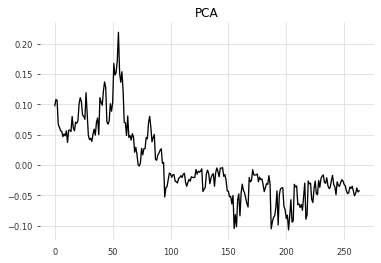

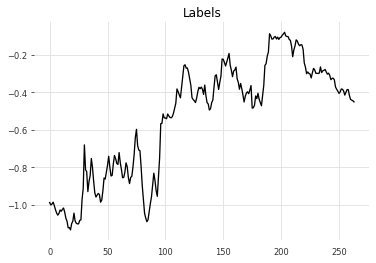

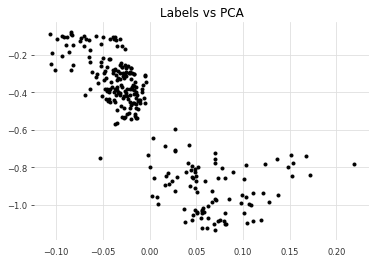

In [46]:
true_data = np.load("phytoplankton_species_abundances.pkl", allow_pickle=True)
true_data = true_data.T

# true_data += 0.01 * np.random.random(true_data.shape)

# from scipy.signal import resample, savgol_filter
# all_out = list()
# for row in true_data.T:
#     sig = resample(row, len(row) * 8)
#     sig = savgol_filter(sig, 31, 3)
#     all_out.append(sig)
# true_data = np.vstack(all_out).T

# true_data = np.load("data_elec.pkl", allow_pickle=True)
# true_data = true_data.T[np.var(true_data, axis=0) > 0].T[:2000, :50]

model = RecurrenceManifold(random_state=0)#, n_samples_pseudotime=100


from sklearn.decomposition import PCA
embedding = PCA()
data_pca = embedding.fit_transform(true_data)[:, 0]

curr_time()
label_vals0 = model.fit_predict(true_data)
curr_time()


plt.figure()
plt.plot(data_pca, 'k')
plt.title("PCA")

plt.figure()
plt.plot(label_vals0, 'k')
plt.title("Labels")

plt.figure()
plt.plot(data_pca, label_vals0, '.k')
plt.title("Labels vs PCA")


In [47]:
import pandas as pd
from utils import nan_fill

DATA_PATH = "data/41467_2017_2571_MOESM4_ESM.xlsx"
DATA_PATH = "data/41467_2017_2571_MOESM6_ESM.xlsx"

data = pd.read_excel(DATA_PATH)
data = data.set_index("OTU")
data = data.transpose()

# Drop metadata in last row
data.drop(data.tail(1).index, inplace=True)

METADATA_PATH = "data/41467_2017_2571_MOESM10_ESM.xlsx"
metadata = pd.read_excel(METADATA_PATH)
metadata = metadata.set_index("OrdinalDay")
metadata.drop(metadata.tail(1).index, inplace=True)

for key in metadata.keys():
    metadata[key][metadata[key] == "nd"] = np.nan
    metadata[key] = nan_fill(np.array(metadata[key]))
#     try:
#         metadata[key][metadata[key] == "nd"] = None
#     except:
#         pass
#         metadata[key][np.array(metadata[key]) == "nd"] = np.nan


/var/folders/g_/3gcjjjc12l9cjdh8drtctrdm0000gp/T/ipykernel_94834/3412745788.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata[key][metadata[key] == "nd"] = np.nan


0.01 mutual_info
1.69 conditional_info
4.7 conditional_info_back
20.34 mae
97.43 mape
89.59 marre
440.6 mse
-14.46 r2_score
20.99 rmse
190.04 smape
-0.52 spearman
-0.48 pearson
-0.34 kendalltau
0.51 sync
1.0 coherence
0.39 coherence_phase


-0.06 mutual_info
1.68 conditional_info
6.36 conditional_info_back
20.88 mae
99.96 mape
91.97 marre
464.0 mse
-15.28 r2_score
21.54 rmse
199.42 smape
0.57 spearman
0.48 pearson
0.37 kendalltau
0.76 sync
1.0 coherence
0.91 coherence_phase


/Users/williamgilpin/miniconda3/envs/ndyn/lib/python3.8/site-packages/scipy/signal/spectral.py:1964: UserWarning: nperseg = 256 is greater than input length  = 92, using nperseg = 92
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/williamgilpin/miniconda3/envs/ndyn/lib/python3.8/site-packages/scipy/signal/spectral.py:1964: UserWarning: nperseg = 256 is greater than input length  = 92, using nperseg = 92
  warnings.warn('nperseg = {0:d} is greater than input length '
[2022-03-23 04:34:29,626] ERROR | darts.metrics.metrics | ValueError: The actual series must be strictly positive to compute the MAPE.




-------
mape  Skipped
0.05 mutual_info
0.48 conditional_info
0.57 conditional_info_back
0.39 mae
23.15 marre
0.23 mse
-0.71 r2_score
0.48 rmse
106.46 smape
-0.14 spearman
-0.1 pearson
-0.1 kendalltau
0.66 sync
1.0 coherence
0.17 coherence_phase


/Users/williamgilpin/miniconda3/envs/ndyn/lib/python3.8/site-packages/scipy/signal/spectral.py:1964: UserWarning: nperseg = 256 is greater than input length  = 92, using nperseg = 92
  warnings.warn('nperseg = {0:d} is greater than input length '
[2022-03-23 04:34:29,713] ERROR | darts.metrics.metrics | ValueError: The actual series must be strictly positive to compute the MAPE.




mape  Skipped
0.1 mutual_info
-0.98 conditional_info
0.79 conditional_info_back
0.38 mae
22.6 marre
0.28 mse
-1.03 r2_score
0.53 rmse
180.57 smape
0.25 spearman
0.18 pearson
0.19 kendalltau
0.76 sync
1.0 coherence
0.99 coherence_phase


-------


/Users/williamgilpin/miniconda3/envs/ndyn/lib/python3.8/site-packages/scipy/signal/spectral.py:1964: UserWarning: nperseg = 256 is greater than input length  = 92, using nperseg = 92
  warnings.warn('nperseg = {0:d} is greater than input length '


-0.22 mutual_info
1.71 conditional_info
4.74 conditional_info_back
1012.41 mae
99.95 mape
3244.91 marre
1025011.39 mse
-30447.87 r2_score
1012.43 rmse
199.79 smape
-0.07 spearman
-0.11 pearson
-0.05 kendalltau
0.45 sync
1.0 coherence
0.68 coherence_phase


/Users/williamgilpin/miniconda3/envs/ndyn/lib/python3.8/site-packages/scipy/signal/spectral.py:1964: UserWarning: nperseg = 256 is greater than input length  = 92, using nperseg = 92
  warnings.warn('nperseg = {0:d} is greater than input length '




-0.18 mutual_info
1.69 conditional_info
6.4 conditional_info_back
1012.95 mae
100.0 mape
3246.64 marre
1026103.54 mse
-30480.31 r2_score
1012.97 rmse
199.99 smape
0.02 spearman
0.04 pearson
0.01 kendalltau
0.69 sync
1.0 coherence
0.72 coherence_phase


/Users/williamgilpin/miniconda3/envs/ndyn/lib/python3.8/site-packages/scipy/signal/spectral.py:1964: UserWarning: nperseg = 256 is greater than input length  = 92, using nperseg = 92
  warnings.warn('nperseg = {0:d} is greater than input length '




-------
0.13 mutual_info
0.61 conditional_info
2.33 conditional_info_back
5.73 mae
90.09 mape
66.6 marre
35.87 mse
-13.27 r2_score
5.99 rmse
165.62 smape
0.46 spearman
0.47 pearson
0.34 kendalltau
0.57 sync
1.0 coherence
0.98 coherence_phase


/Users/williamgilpin/miniconda3/envs/ndyn/lib/python3.8/site-packages/scipy/signal/spectral.py:1964: UserWarning: nperseg = 256 is greater than input length  = 92, using nperseg = 92
  warnings.warn('nperseg = {0:d} is greater than input length '




0.09 mutual_info
0.4 conditional_info
3.82 conditional_info_back
6.27 mae
99.86 mape
72.86 marre
41.69 mse
-15.59 r2_score
6.46 rmse
197.98 smape
-0.52 spearman
-0.5 pearson
-0.36 kendalltau
0.83 sync
1.0 coherence
0.2 coherence_phase


/Users/williamgilpin/miniconda3/envs/ndyn/lib/python3.8/site-packages/scipy/signal/spectral.py:1964: UserWarning: nperseg = 256 is greater than input length  = 92, using nperseg = 92
  warnings.warn('nperseg = {0:d} is greater than input length '




-------
-0.2 mutual_info
1.08 conditional_info
3.37 conditional_info_back
6.62 mae
91.18 mape
56.24 marre
51.46 mse
-5.95 r2_score
7.17 rmse
168.83 smape
-0.01 spearman
0.08 pearson
0.02 kendalltau
0.41 sync
1.0 coherence
0.73 coherence_phase


/Users/williamgilpin/miniconda3/envs/ndyn/lib/python3.8/site-packages/scipy/signal/spectral.py:1964: UserWarning: nperseg = 256 is greater than input length  = 92, using nperseg = 92
  warnings.warn('nperseg = {0:d} is greater than input length '




-0.28 mutual_info
0.97 conditional_info
4.95 conditional_info_back
7.16 mae
99.99 mape
60.82 marre
58.64 mse
-6.91 r2_score
7.66 rmse
198.37 smape
0.02 spearman
-0.06 pearson
0.01 kendalltau
0.65 sync
1.0 coherence
0.67 coherence_phase


/Users/williamgilpin/miniconda3/envs/ndyn/lib/python3.8/site-packages/scipy/signal/spectral.py:1964: UserWarning: nperseg = 256 is greater than input length  = 92, using nperseg = 92
  warnings.warn('nperseg = {0:d} is greater than input length '
[2022-03-23 04:34:30,471] ERROR | darts.metrics.metrics | ValueError: The actual series must be strictly positive to compute the MAPE.




-------
mape  Skipped
0.48 mutual_info
17.12 conditional_info
1.7 conditional_info_back
1.26 mae
31.62 marre
2.44 mse
-0.36 r2_score
1.56 rmse
163.9 smape
0.19 spearman
0.13 pearson
0.15 kendalltau
0.37 sync
1.0 coherence
0.78 coherence_phase


/Users/williamgilpin/miniconda3/envs/ndyn/lib/python3.8/site-packages/scipy/signal/spectral.py:1964: UserWarning: nperseg = 256 is greater than input length  = 92, using nperseg = 92
  warnings.warn('nperseg = {0:d} is greater than input length '
[2022-03-23 04:34:30,567] ERROR | darts.metrics.metrics | ValueError: The actual series must be strictly positive to compute the MAPE.




mape  Skipped
0.48 mutual_info
15.43 conditional_info
1.7 conditional_info_back
1.22 mae
30.58 marre
3.23 mse
-0.8 r2_score
1.8 rmse
196.58 smape
-0.2 spearman
-0.15 pearson
-0.15 kendalltau
0.59 sync
1.0 coherence
0.61 coherence_phase


/Users/williamgilpin/miniconda3/envs/ndyn/lib/python3.8/site-packages/scipy/signal/spectral.py:1964: UserWarning: nperseg = 256 is greater than input length  = 92, using nperseg = 92
  warnings.warn('nperseg = {0:d} is greater than input length '
[2022-03-23 04:34:30,680] ERROR | darts.metrics.metrics | ValueError: The actual series must be strictly positive to compute the MAPE.




-------
mape  Skipped
-0.16 mutual_info
0.85 conditional_info
2.75 conditional_info_back
2.26 mae
10.44 marre
15.6 mse


/Users/williamgilpin/miniconda3/envs/ndyn/lib/python3.8/site-packages/scipy/signal/spectral.py:1964: UserWarning: nperseg = 256 is greater than input length  = 92, using nperseg = 92
  warnings.warn('nperseg = {0:d} is greater than input length '


-0.38 r2_score
3.95 rmse
129.66 smape
0.24 spearman
0.18 pearson
0.17 kendalltau
0.4 sync
1.0 coherence
0.99 coherence_phase




[2022-03-23 04:34:30,766] ERROR | darts.metrics.metrics | ValueError: The actual series must be strictly positive to compute the MAPE.


mape  Skipped
-0.14 mutual_info
0.58 conditional_info
4.16 conditional_info_back
2.5 mae
11.52 marre
17.46 mse
-0.54 r2_score


/Users/williamgilpin/miniconda3/envs/ndyn/lib/python3.8/site-packages/scipy/signal/spectral.py:1964: UserWarning: nperseg = 256 is greater than input length  = 92, using nperseg = 92
  warnings.warn('nperseg = {0:d} is greater than input length '


4.18 rmse
190.62 smape
-0.22 spearman
-0.19 pearson
-0.15 kendalltau
0.53 sync
1.0 coherence
0.14 coherence_phase


-------


[2022-03-23 04:34:30,876] ERROR | darts.metrics.metrics | ValueError: The actual series must be strictly positive to compute the MAPE.
/Users/williamgilpin/miniconda3/envs/ndyn/lib/python3.8/site-packages/scipy/signal/spectral.py:1964: UserWarning: nperseg = 256 is greater than input length  = 92, using nperseg = 92
  warnings.warn('nperseg = {0:d} is greater than input length '


mape  Skipped
0.47 mutual_info
13.23 conditional_info
-0.42 conditional_info_back
0.44 mae
63.46 marre
0.3 mse
-13.13 r2_score
0.55 rmse
132.78 smape
0.1 spearman
0.17 pearson
0.08 kendalltau
0.4 sync
1.0 coherence
0.84 coherence_phase




[2022-03-23 04:34:30,969] ERROR | darts.metrics.metrics | ValueError: The actual series must be strictly positive to compute the MAPE.


mape  Skipped
0.48 mutual_info
11.67 conditional_info
-0.29 conditional_info_back
0.15 mae
21.18 marre
0.04 mse
-0.81 r2_score
0.2 rmse
173.88 smape
-0.11 spearman
-0.17 pearson
-0.09 kendalltau
0.64 sync
1.0 coherence
0.55 coherence_phase


/Users/williamgilpin/miniconda3/envs/ndyn/lib/python3.8/site-packages/scipy/signal/spectral.py:1964: UserWarning: nperseg = 256 is greater than input length  = 92, using nperseg = 92
  warnings.warn('nperseg = {0:d} is greater than input length '




-------
0.49 mutual_info
16.54 conditional_info
0.59 conditional_info_back
33.66 mae
98.41 mape
711.56 marre
1133.38 mse
-3571.5 r2_score
33.67 rmse
193.79 smape
0.58 spearman
0.56 pearson
0.46 kendalltau
0.87 sync
1.0 coherence
1.0 coherence_phase


/Users/williamgilpin/miniconda3/envs/ndyn/lib/python3.8/site-packages/scipy/signal/spectral.py:1964: UserWarning: nperseg = 256 is greater than input length  = 92, using nperseg = 92
  warnings.warn('nperseg = {0:d} is greater than input length '




0.49 mutual_info
14.32 conditional_info
0.05 conditional_info_back
34.2 mae
100.0 mape
722.95 marre
1169.64 mse
-3685.8 r2_score
34.2 rmse
199.71 smape
-0.59 spearman
-0.47 pearson
-0.46 kendalltau
0.76 sync
1.0 coherence
0.09 coherence_phase


/Users/williamgilpin/miniconda3/envs/ndyn/lib/python3.8/site-packages/scipy/signal/spectral.py:1964: UserWarning: nperseg = 256 is greater than input length  = 92, using nperseg = 92
  warnings.warn('nperseg = {0:d} is greater than input length '




-------
-0.07 mutual_info
0.88 conditional_info
2.9 conditional_info_back
4.22 mae
84.47 mape
43.5 marre
22.69 mse
-4.17 r2_score
4.76 rmse
151.39 smape
0.22 spearman
0.32 pearson
0.14 kendalltau
0.54 sync
1.0 coherence
1.0 coherence_phase


/Users/williamgilpin/miniconda3/envs/ndyn/lib/python3.8/site-packages/scipy/signal/spectral.py:1964: UserWarning: nperseg = 256 is greater than input length  = 92, using nperseg = 92
  warnings.warn('nperseg = {0:d} is greater than input length '




-0.08 mutual_info
0.69 conditional_info
4.39 conditional_info_back
4.76 mae
99.76 mape
49.05 marre
26.95 mse
-5.14 r2_score
5.19 rmse
196.84 smape
-0.24 spearman
-0.32 pearson
-0.15 kendalltau
0.75 sync
1.0 coherence
0.01 coherence_phase


/Users/williamgilpin/miniconda3/envs/ndyn/lib/python3.8/site-packages/scipy/signal/spectral.py:1964: UserWarning: nperseg = 256 is greater than input length  = 92, using nperseg = 92
  warnings.warn('nperseg = {0:d} is greater than input length '
[2022-03-23 04:34:31,520] ERROR | darts.metrics.metrics | ValueError: The actual series must be strictly positive to compute the MAPE.




-------
mape  Skipped
0.49 mutual_info
34.77 conditional_info
0.51 conditional_info_back
0.51 mae
50.59 marre


/Users/williamgilpin/miniconda3/envs/ndyn/lib/python3.8/site-packages/scipy/signal/spectral.py:1964: UserWarning: nperseg = 256 is greater than input length  = 92, using nperseg = 92
  warnings.warn('nperseg = {0:d} is greater than input length '


0.34 mse
-0.4 r2_score
0.58 rmse
125.58 smape
0.02 spearman
0.0 pearson
0.02 kendalltau
0.41 sync
1.0 coherence
0.93 coherence_phase




[2022-03-23 04:34:31,600] ERROR | darts.metrics.metrics | ValueError: The actual series must be strictly positive to compute the MAPE.


mape  Skipped
0.5 mutual_info
31.22 conditional_info
-1.36 conditional_info_back
0.61 mae
60.61 marre
0.59 mse
-1.43 r2_score
0.77 rmse
194.46 smape
0.01 spearman
0.01 pearson
0.01 kendalltau
0.63 sync
1.0 coherence
0.35 coherence_phase


/Users/williamgilpin/miniconda3/envs/ndyn/lib/python3.8/site-packages/scipy/signal/spectral.py:1964: UserWarning: nperseg = 256 is greater than input length  = 92, using nperseg = 92
  warnings.warn('nperseg = {0:d} is greater than input length '
/var/folders/g_/3gcjjjc12l9cjdh8drtctrdm0000gp/T/ipykernel_94834/1483049928.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()




-------
-0.11 mutual_info
0.45 conditional_info
1.68 conditional_info_back
2.49 mae
80.31 mape
72.94 marre
7.2 mse
-7.02 r2_score
2.68 rmse
138.27 smape
-0.07 spearman
-0.03 pearson
-0.05 kendalltau
0.45 sync
1.0 coherence
0.99 coherence_phase


/Users/williamgilpin/miniconda3/envs/ndyn/lib/python3.8/site-packages/scipy/signal/spectral.py:1964: UserWarning: nperseg = 256 is greater than input length  = 92, using nperseg = 92
  warnings.warn('nperseg = {0:d} is greater than input length '




-0.03 mutual_info
-0.08 conditional_info
2.83 conditional_info_back
3.03 mae
99.95 mape
88.71 marre
10.09 mse
-10.25 r2_score
3.18 rmse
196.35 smape
0.02 spearman
0.04 pearson
0.02 kendalltau
0.7 sync
1.0 coherence
0.14 coherence_phase


/Users/williamgilpin/miniconda3/envs/ndyn/lib/python3.8/site-packages/scipy/signal/spectral.py:1964: UserWarning: nperseg = 256 is greater than input length  = 92, using nperseg = 92
  warnings.warn('nperseg = {0:d} is greater than input length '




-------
0.06 mutual_info
0.97 conditional_info
3.21 conditional_info_back
15.39 mae
96.59 mape
152.34 marre
242.35 mse
-39.73 r2_score
15.57 rmse
186.96 smape
-0.34 spearman
-0.28 pearson
-0.22 kendalltau
0.46 sync
1.0 coherence
0.59 coherence_phase


/Users/williamgilpin/miniconda3/envs/ndyn/lib/python3.8/site-packages/scipy/signal/spectral.py:1964: UserWarning: nperseg = 256 is greater than input length  = 92, using nperseg = 92
  warnings.warn('nperseg = {0:d} is greater than input length '




0.1 mutual_info
0.91 conditional_info
4.84 conditional_info_back
15.92 mae
99.99 mape
157.67 marre
259.51 mse
-42.62 r2_score
16.11 rmse
199.35 smape
0.3 spearman
0.17 pearson
0.21 kendalltau
0.71 sync
1.0 coherence
0.8 coherence_phase


-------
-0.07 mutual_info
0.48 conditional_info
0.62 conditional_info_back
0.56 mae
71.19 mape
18.87 marre
0.61 mse


/Users/williamgilpin/miniconda3/envs/ndyn/lib/python3.8/site-packages/scipy/signal/spectral.py:1964: UserWarning: nperseg = 256 is greater than input length  = 92, using nperseg = 92
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/williamgilpin/miniconda3/envs/ndyn/lib/python3.8/site-packages/scipy/signal/spectral.py:1964: UserWarning: nperseg = 256 is greater than input length  = 92, using nperseg = 92
  warnings.warn('nperseg = {0:d} is greater than input length '


-0.83 r2_score
0.78 rmse
74.64 smape
0.47 spearman
0.3 pearson
0.34 kendalltau
0.71 sync
1.0 coherence
1.0 coherence_phase


-0.18 mutual_info
-0.79 conditional_info
1.03 conditional_info_back
0.81 mae
97.78 mape
27.27 marre
0.97 mse
-1.92 r2_score
0.99 rmse
181.79 smape
-0.49 spearman
-0.37 pearson
-0.35 kendalltau
0.67 sync
1.0 coherence
0.0 coherence_phase


-------
-0.07 mutual_info
0.86 conditional_info
2.87 conditional_info_back
5.0 mae
87.62 mape
42.75 marre
31.29 mse
-4.56 r2_score
5.59 rmse
158.41 smape
0.37 spearman
0.37 pearson
0.25 kendalltau
0.5 sync
1.0 coherence
0.95 coherence_phase


/Users/williamgilpin/miniconda3/envs/ndyn/lib/python3.8/site-packages/scipy/signal/spectral.py:1964: UserWarning: nperseg = 256 is greater than input length  = 92, using nperseg = 92
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/williamgilpin/miniconda3/envs/ndyn/lib/python3.8/site-packages/scipy/signal/spectral.py:1964: UserWarning: nperseg = 256 is greater than input length  = 92, using nperseg = 92
  warnings.warn('nperseg = {0:d} is greater than input length '




-0.08 mutual_info
0.69 conditional_info
4.38 conditional_info_back
5.54 mae
99.77 mape
47.36 marre
36.22 mse
-5.43 r2_score
6.02 rmse
197.4 smape
-0.46 spearman
-0.44 pearson
-0.31 kendalltau
0.75 sync
1.0 coherence
0.35 coherence_phase


-------


/Users/williamgilpin/miniconda3/envs/ndyn/lib/python3.8/site-packages/scipy/signal/spectral.py:1964: UserWarning: nperseg = 256 is greater than input length  = 92, using nperseg = 92
  warnings.warn('nperseg = {0:d} is greater than input length '


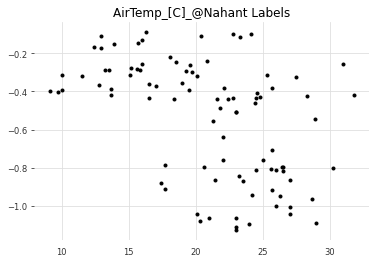

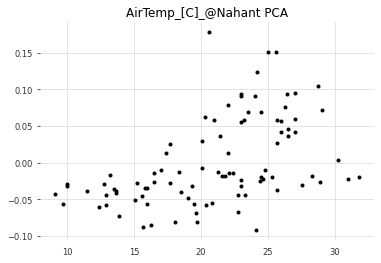

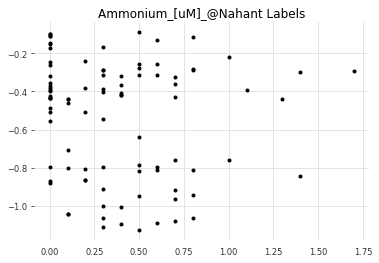

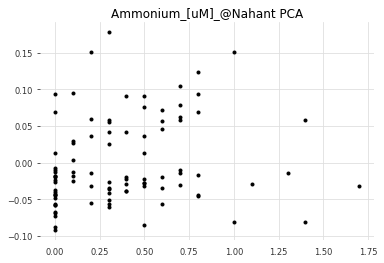

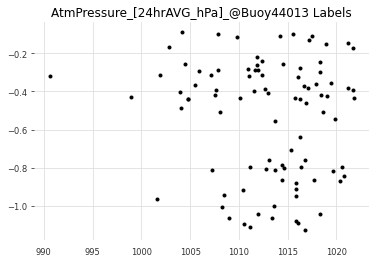

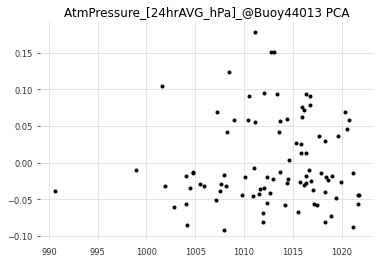

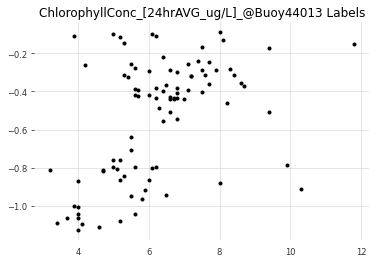

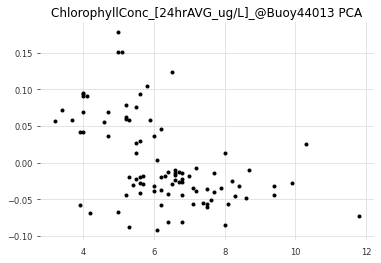

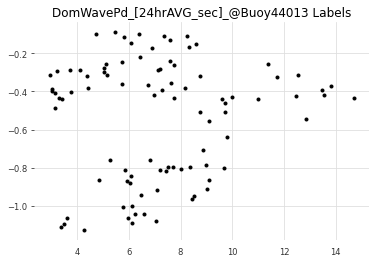

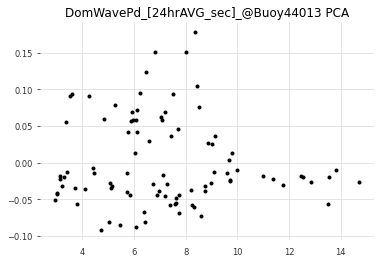

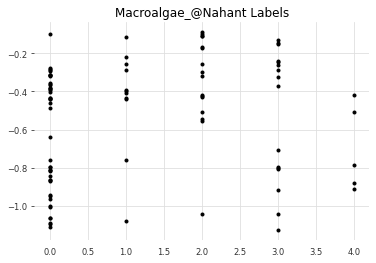

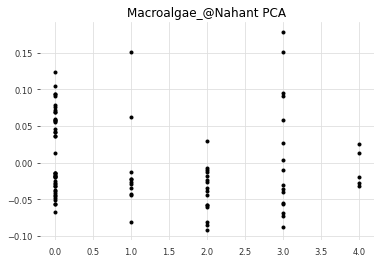

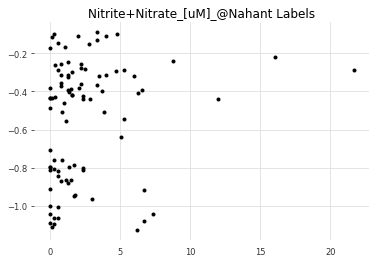

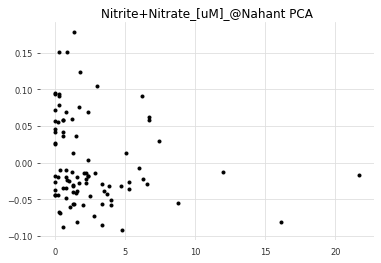

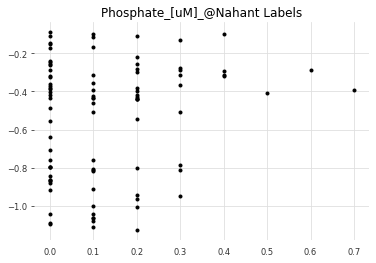

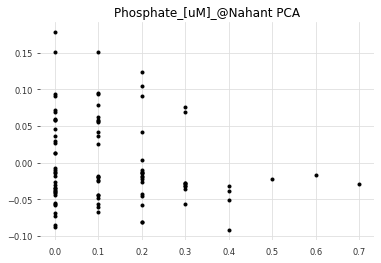

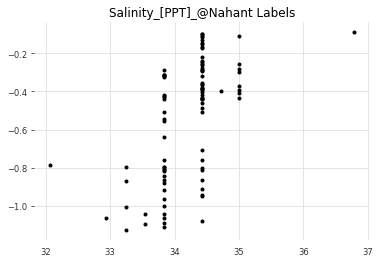

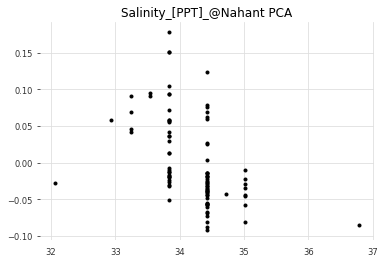

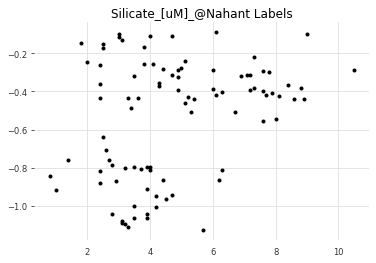

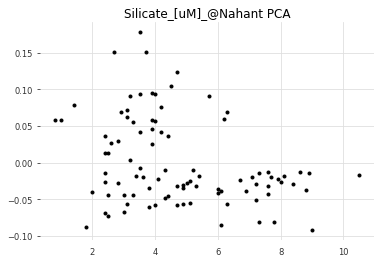

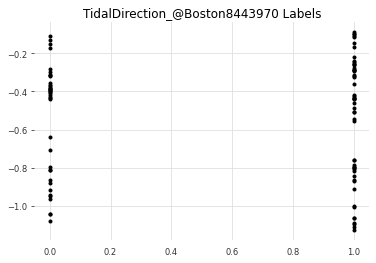

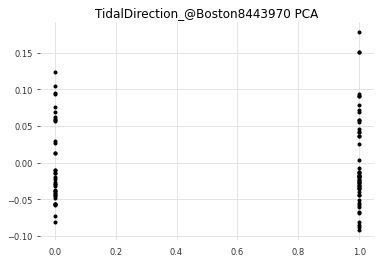

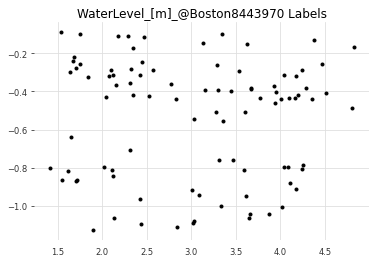

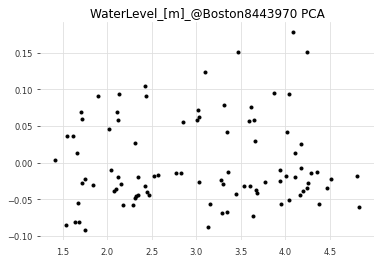

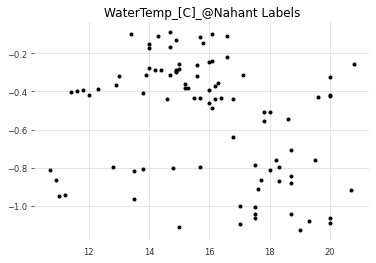

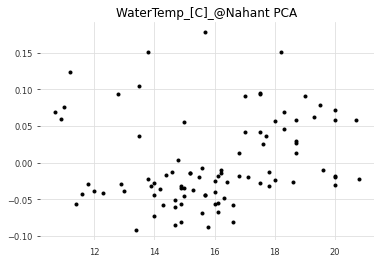

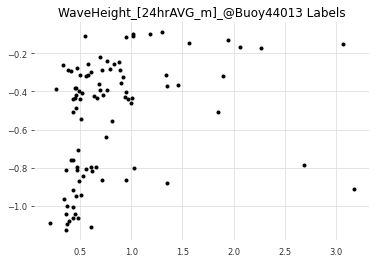

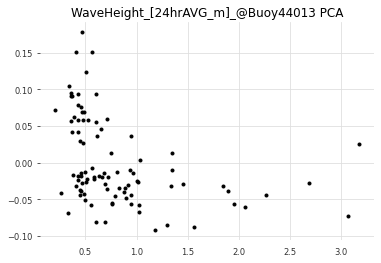

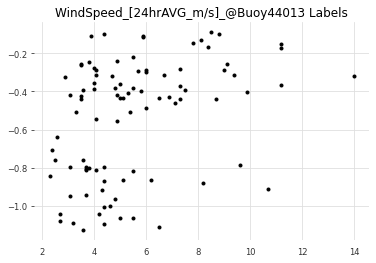

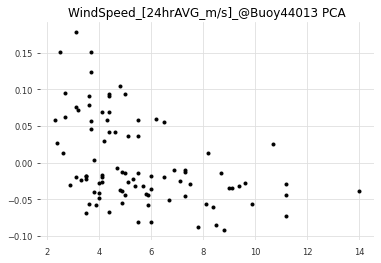

In [49]:
from scipy.stats import spearmanr

all_drivers = list()
for key in metadata:
    true_driver = np.array(metadata[key].astype(float))
    true_driver = nan_fill(true_driver).astype(float)
    all_drivers.append(true_driver)
    
#     true_driver = resample(true_driver, len(label_vals))
#     plt.figure()
# #     plt.plot(true_driver)
#     plt.plot(true_driver, label_vals, '.k', markersize=1)
#     plt.title(key + ' ' + str(spearmanr(true_driver, label_vals).correlation) )
#     print(key, " ", spearmanr(true_driver, label_vals), flush=True)
    
    
    label_vals = resample(label_vals0, len(true_driver))
    pca_vals = resample(data_pca, len(true_driver))
    
    
#     plt.plot(true_driver)
    print_dict(score_ts(true_driver, label_vals))
    print_dict(score_ts(true_driver, pca_vals))
    print("-------")
    
    plt.figure()
    plt.plot(true_driver, label_vals, '.k')
    plt.title(key + " Labels")
    
    plt.figure()
    plt.plot(true_driver, pca_vals , '.k')
    plt.title(key + " PCA")
    

    
all_drivers = np.vstack(all_drivers).T

all_drivers_pca = PCA().fit_transform(all_drivers)

## Electricity

Current Time:  04:55:43
Current Time:  04:55:43
Current Time:  04:55:55
Current Time:  04:55:55
Matrix sparsity is:  0.9900000225676522
Current Time:  04:55:55
asymmetry:  0.0
Current Time:  04:55:58
Assigning pseudotime labels.
....................



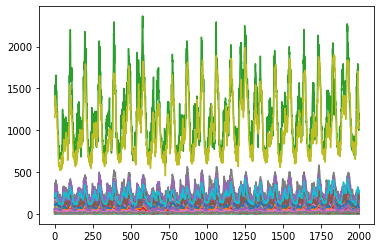

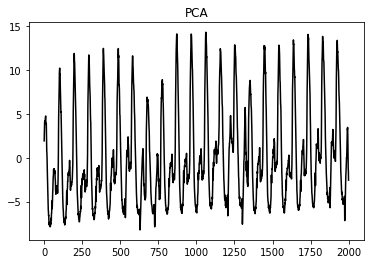

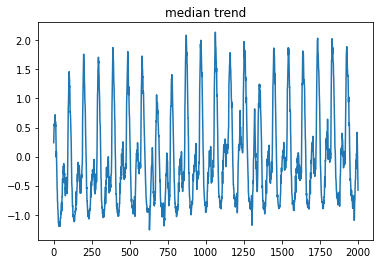

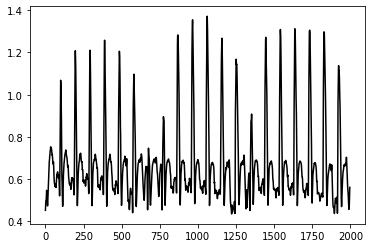

In [1468]:
true_data = np.load("data_elec.pkl", allow_pickle=True)
true_data = true_data.T[np.var(true_data, axis=0) > 0].T[:2000, :50]

# true_data += np.random.random(true_data.shape)

plt.figure()
plt.plot(true_data);

from sklearn.decomposition import PCA
embedding = PCA()
data_pca = embedding.fit_transform(standardize_ts(true_data))
plt.figure()
plt.plot(data_pca[:, 0], 'k')
plt.title("PCA")

# model = RecurrenceManifold(weighted_connectivity=True) 
# model = RecurrenceManifold(weighted_connectivity=True, merge="percentile") 
model = RecurrenceManifold(weighted_connectivity=True, start="multiple") 
label_vals = model.fit_predict(true_data) 

# # model.fit(true_data, root_index=np.argmin(np.mean(standardize_ts(true_data), axis=-1)))
# # label_vals = model.labels_


# # # # model = RecurrenceClustering()
# # # # label_vals = model.fit_predict(trude_data[:4000, 12])

plt.figure()
plt.plot(np.median(standardize_ts(true_data), axis=-1))
plt.title("median trend")

plt.figure()
plt.plot(label_vals, 'k')


## Equities

This looks like VIX, even though vix is calculated using information not available to the model

Daily closing prices from Yahoo finance

Current Time:  04:50:02
Current Time:  04:50:02
Current Time:  04:52:01
Current Time:  04:52:01
Matrix sparsity is:  0.99000001002003
Current Time:  04:52:01
asymmetry:  0.0
Current Time:  04:52:03
Assigning pseudotime labels.
....................



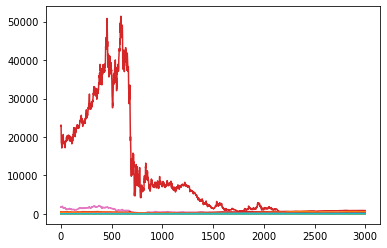

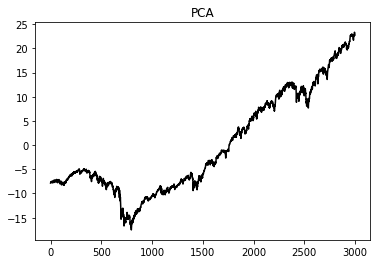

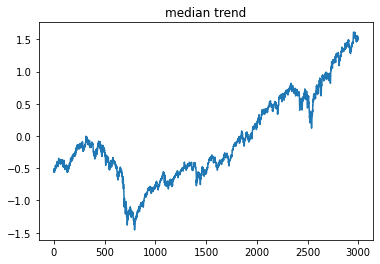

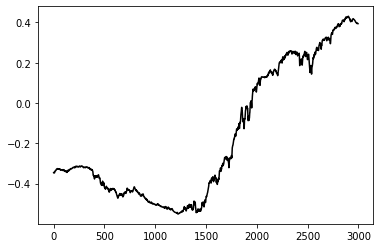

In [1459]:
true_data = np.load("stocks.pkl", allow_pickle=True)

# true_data = true_data[:, :120]

# true_data += 0.001 * np.random.random(true_data.shape)

# from scipy.signal import resample, savgol_filter
# all_out = list()
# for row in true_data.T:
#     sig = resample(row, len(row) * 8)
#     sig = savgol_filter(sig, 31, 3)
#     all_out.append(sig)
# true_data = np.vstack(all_out).T

# true_data = np.load("data_elec.pkl", allow_pickle=True)
# true_data = true_data.T[np.var(true_data, axis=0) > 0].T[:2000, :50]

plt.figure()
plt.plot(true_data);

from sklearn.decomposition import PCA
embedding = PCA()
data_pca = embedding.fit_transform(standardize_ts(true_data))
plt.figure()
plt.plot(data_pca[:, 0], 'k')
plt.title("PCA")

model = RecurrenceManifold(weighted_connectivity=True, start="multiple")
label_vals = model.fit_predict(true_data) 

# model.fit(true_data, root_index=np.argmin(np.mean(standardize_ts(true_data), axis=-1)))
# label_vals = model.labels_


# # # model = RecurrenceClustering()
# # # label_vals = model.fit_predict(trude_data[:4000, 12])

plt.figure()
plt.plot(np.median(standardize_ts(true_data), axis=-1))
plt.title("median trend")

plt.figure()
plt.plot(label_vals, 'k')

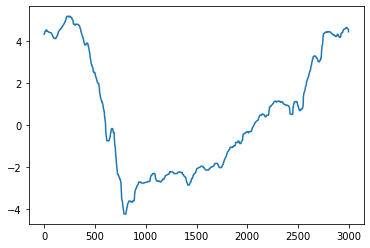

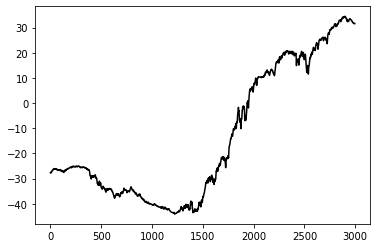

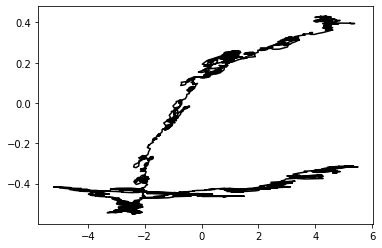

In [1467]:
from scipy.signal import detrend
import pandas as pd
from scipy.signal import medfilt

# df = pd.read_csv("big_data/stock/1 Day/Stocks/aapl.us.txt")
# df = pd.read_csv("big_data/stock/1 Day/ETFs/schb.us.txt")
# df = pd.read_csv("big_data/stock/1 Day/ETFs/aapl.us.txt")


df = pd.read_csv("big_data/stock/1 Day/ETFs/pey.us.txt")

# df = pd.read_csv("big_data/stock/VTI.csv")
# df = pd.read_csv("big_data/stock/vix.csv")
mask = (df['Date'] > '2006-01-09') & (df['Date'] <= '2017-12-06')
df = df.loc[mask]
sig = df["Close"].to_numpy()


# sig = sig - ((sig[-1] - sig[0]) / len(sig)) * np.arange(len(sig)) + sig[0]
# m, b = np.polyfit(np.arange(len(sig)), sig, 1)
# sig = sig - (m *np.arange(len(sig)) + b)
## detrend exponential growth
m, b = np.polyfit(np.arange(len(sig)), np.log(sig), 1)
sig = sig - (np.exp(m * np.arange(len(sig))) * np.exp(b))

plt.figure()
plt.plot(medfilt(sig, 51))

plt.figure()
plt.plot(80 * label_vals, 'k')



plt.figure()
plt.plot(sig[:len(label_vals)], label_vals, 'k')

In [ ]:
import glob

for i, dpath in enumerate(glob.glob("big_data/stock/1 Day/ETFs/*")):
    try:
        df = pd.read_csv(dpath)
        mask = (df['Date'] > '2006-01-09') & (df['Date'] <= '2017-12-06')
        df = df.loc[mask]
        sig = df["Close"].to_numpy()

        ## detrend exponential growth
        m, b = np.polyfit(np.arange(len(sig)), np.log(sig), 1)
        sig = sig - (np.exp(m * np.arange(len(sig))) * np.exp(b))
        corr = np.abs(scipy.stats.kendalltau(sig[:len(label_vals)], label_vals).correlation)
        if corr > 0.5:
            print(corr, " ", dpath, flush=True)
        else:
            pass
    except:
        pass
        

Current Time:  04:20:15
Current Time:  04:20:15
Current Time:  04:20:16
Current Time:  04:20:17
Matrix sparsity is:  0.99000001002003
Current Time:  04:20:17
asymmetry:  0.0
Current Time:  04:20:19
Assigning pseudotime labels.
....................

Current Time:  04:20:55
Current Time:  04:20:55
Current Time:  04:20:57
Current Time:  04:20:57
Matrix sparsity is:  0.99000001002003
Current Time:  04:20:57
asymmetry:  0.0
Current Time:  04:21:00
Assigning pseudotime labels.
....................

0.11353718053463388 4.5715253505361437e-10
-0.1440340529905873 2.242346424764101e-15


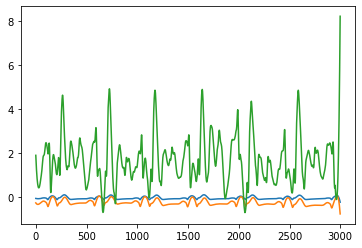

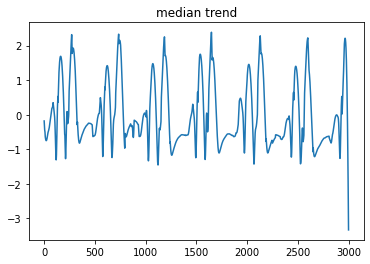

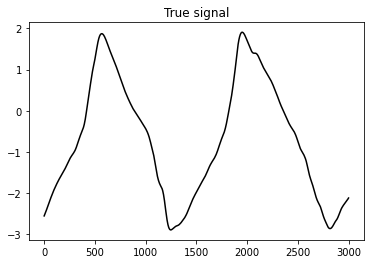

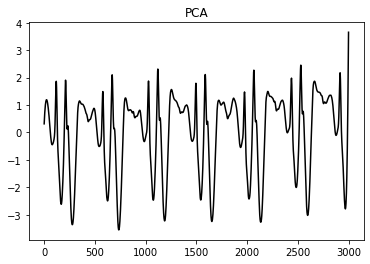

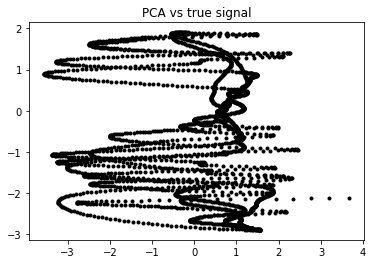

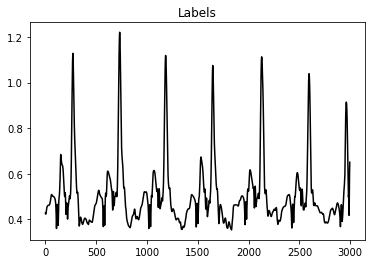

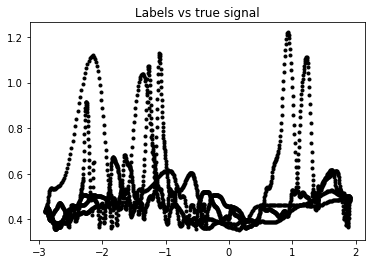

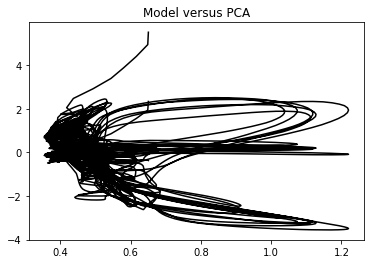

In [1610]:
true_data = np.load("physio.pkl", allow_pickle=True)
true_drive = np.load("physio_drive.pkl", allow_pickle=True)

all_out = list()
for row in true_data.T:
    sig = row
    #sig = resample(row, len(row) * 8)
    sig = savgol_filter(sig, 101, 3)
    all_out.append(sig)
true_data = np.vstack(all_out).T


from sklearn.decomposition import PCA
embedding = PCA()
data_pca = embedding.fit_transform(standardize_ts(true_data))

model = RecurrenceManifold(weighted_connectivity=True, start="multiple") 
# model = RecurrenceManifold(weighted_connectivity=True, merge="percentile") 
label_vals = model.fit_predict(true_data) 





plt.figure()
plt.plot(true_data);

from sklearn.decomposition import PCA
embedding = PCA()
data_pca = embedding.fit_transform(standardize_ts(true_data))

model = RecurrenceManifold(weighted_connectivity=True, start="multiple") 
# model = RecurrenceManifold(weighted_connectivity=True, merge="percentile") 
label_vals = model.fit_predict(true_data) 

# true_drive = savgol_filter(true_drive, 151, 3)

plt.figure()
plt.plot(np.median(standardize_ts(true_data), axis=-1))
plt.title("median trend")

plt.figure()
# plt.semilogy(label_vals, 'k')
plt.plot(true_drive, 'k')
plt.title("True signal")

plt.figure()
plt.plot(data_pca[:, 0], 'k')
plt.title("PCA")

plt.figure()
plt.plot(true_drive, data_pca[:, 0], '.k')
plt.title("PCA vs true signal")

# model.fit(true_data, root_index=np.argmin(np.mean(standardize_ts(true_data), axis=-1)))
plt.figure()
plt.plot(label_vals, 'k')
plt.title("Labels")

plt.figure()
# plt.semilogy(label_vals, 'k')
plt.plot(true_drive[:len(label_vals)], label_vals, '.k')
plt.title("Labels vs true signal")


plt.figure()
# plt.semilogy(label_vals, 'k')
plt.plot(label_vals, data_pca[:len(label_vals)], 'k')
plt.title("Model versus PCA")


from scipy.stats import spearmanr

corr = spearmanr(label_vals, true_drive[:len(label_vals)])
print(corr.correlation, corr.pvalue)

corr = spearmanr(data_pca[:, 0], true_drive)
print(corr.correlation, corr.pvalue)


## Physiology database

EEG, ECG, and respiration signal with separate behavioral readouts

In [135]:
true_data = np.load("eeg2.pkl", allow_pickle=True)
true_driver = np.load("eeg2_drive.pkl", allow_pickle=True)
true_data = detrend_ts(true_data)
true_driver = np.squeeze(detrend_ts(true_driver[:, None]))

# all_out = list()
# for row in true_data.T:
#     sig = row
#     #sig = resample(row, len(row) * 8)
#     sig = savgol_filter(sig, 51, 3)
#     all_out.append(sig)
# true_data = np.vstack(all_out).T
# true_drive = savgol_filter(true_drive, 151, 3)

Current Time:  01:21:14
Current Time:  01:21:14
Computing distance matrix... Current Time:  01:21:16
done.
Current Time:  01:21:16
Matrix sparsity is:  0.9900002222222222
Current Time:  01:21:16
Assigning pseudotime labels.
....................

Current Time:  01:21:48


Text(0.5, 1.0, 'true')

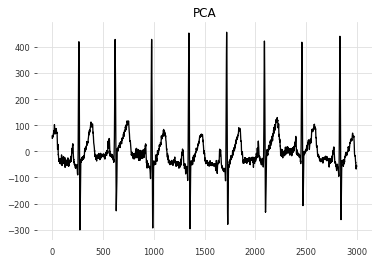

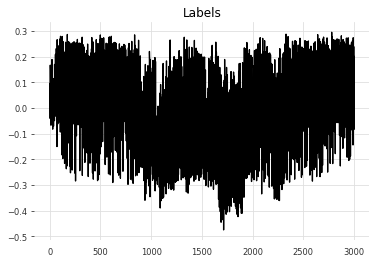

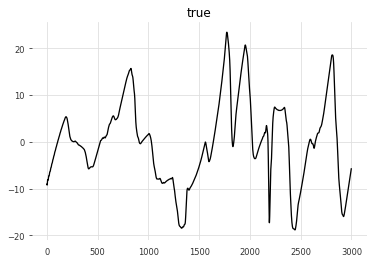

In [136]:
true_data = detrend_ts(true_data)
true_driver = np.squeeze(detrend_ts(true_driver[:, None]))

from sklearn.decomposition import PCA
embedding = PCA()
data_pca = embedding.fit_transform(true_data)[:, 0]


# model = RecurrenceManifold(random_state=0, detrend=True, n_samples_pseudotime=100) 
# check stadardization here
model = RecurrenceManifold(random_state=0)#, n_samples_pseudotime=100, sampling_method_pseudotime="shifted_random") 

curr_time()
label_vals0 = model.fit_predict(true_data)
curr_time()


plt.figure()
plt.plot(data_pca, 'k')
plt.title("PCA")

plt.figure()
plt.plot(label_vals0, 'k')
plt.title("Labels")

plt.figure()
plt.plot(true_driver, 'k')
plt.title("true")

0.02 mutual_info
1.4 conditional_info
1.31 conditional_info_back
1.13 mae
1170.36 mape
23.94 marre
1.99 mse
-0.99 r2_score
1.41 rmse
144.71 smape
0.02 spearman
-0.0 pearson
0.01 kendalltau
0.37 sync
0.05 coherence
0.69 coherence_phase
0.03 cross forecast error
0.03 cross forecast error neural


0.09 mutual_info
0.78 conditional_info
0.99 conditional_info_back
1.01 mae
1858.57 mape
21.47 marre
1.87 mse
-0.87 r2_score
1.37 rmse
145.22 smape
-0.08 spearman
-0.07 pearson
-0.05 kendalltau
0.45 sync
0.04 coherence
0.77 coherence_phase
0.12 cross forecast error
0.12 cross forecast error neural




Text(0.5, 1.0, 'Labels vs PCA: 0.04227640270207545 0.020577704149776468')

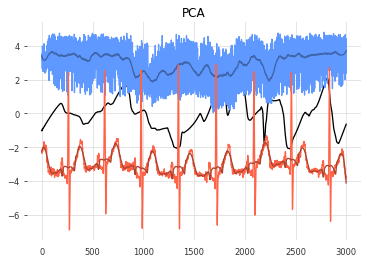

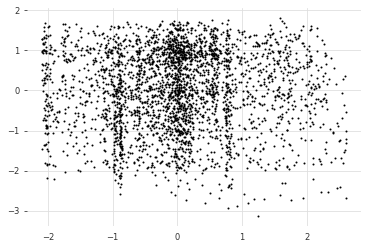

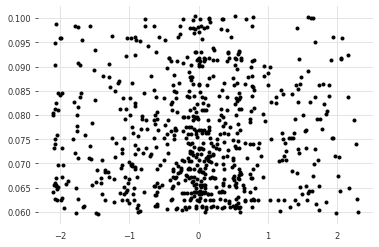

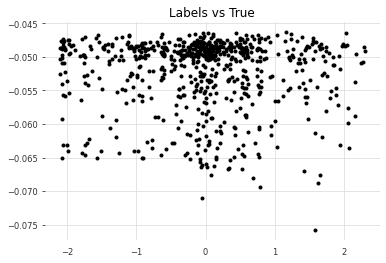

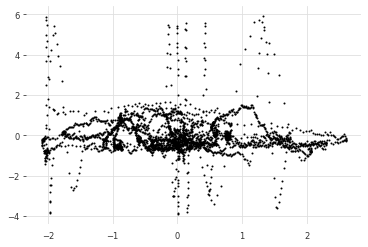

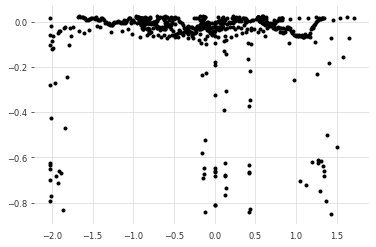

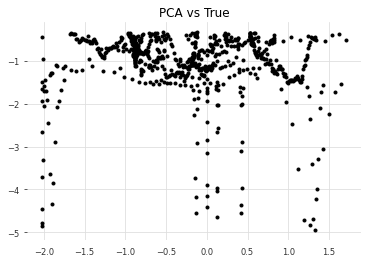

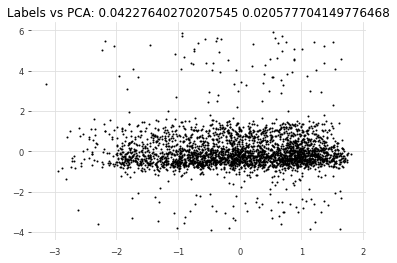

In [137]:
import degas as dg
from scipy.signal import savgol_filter

true_driver = standardize_ts(true_driver)
label_vals = standardize_ts(label_vals0)
pca_vals = standardize_ts(data_pca)

# label_vals = savgol_filter(label_vals, 131, 3)
# pca_vals = savgol_filter(pca_vals, 131, 3)

# label_vals = savgol_filter(label_vals, 131, 3, deriv=1)
# pca_vals = savgol_filter(pca_vals, 131, 3, deriv=1)
# true_driver = savgol_filter(true_driver, 11, 3, deriv=1)
# true_driver *= 10

plt.figure()
plt.plot(true_driver, 'k')
plt.title("True")

# plt.figure()
plt.plot(3 + label_vals, color=dg.blue)
plt.plot(savgol_filter(3 + label_vals, 131, 3), color=dg.darker(dg.blue))
# plt.plot(np.cumsum(label_vals - np.mean(label_vals)))
plt.title("Labels")

# plt.figure()
plt.plot(-3 + pca_vals, color=dg.red)
plt.plot(savgol_filter(-3 + pca_vals , 131, 3), color=dg.darker(dg.red))
plt.title("PCA")




plt.figure()
plt.plot(true_driver, label_vals, '.k', markersize=2)
print_dict(score_ts(true_driver, label_vals))
plt.title("Labels vs True")


plt.figure()
plt.plot(true_driver, pca_vals, '.k', markersize=2)
print_dict(score_ts(true_driver, pca_vals))
plt.title("PCA vs True")

plt.figure()
plt.plot(label_vals, pca_vals, '.k', markersize=2)
corr = spearmanr(label_vals, pca_vals)
plt.title("Labels vs PCA: " + str(corr.correlation) + " " + str(corr.pvalue))


# Natal ECG

Text(0.5, 1.0, 'median trend')

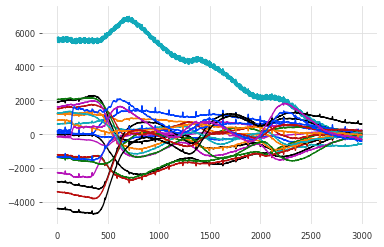

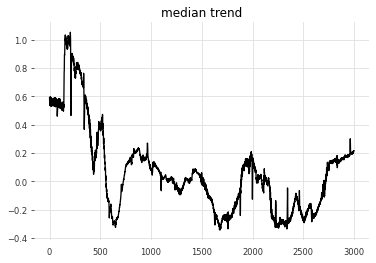

In [50]:
true_data = np.load("ecg.pkl", allow_pickle=True)
true_driver = np.load("resp.pkl", allow_pickle=True)

plt.figure()
plt.plot(true_data);

plt.figure()
plt.plot(np.median(standardize_ts(true_data), axis=-1))
plt.title("median trend")



Current Time:  04:36:58
Current Time:  04:36:58
Computing distance matrix... Current Time:  04:37:03
done.
Current Time:  04:37:03
Matrix sparsity is:  0.9900002222222222
Current Time:  04:37:03
Assigning pseudotime labels.
....................

Current Time:  04:37:34


Text(0.5, 1.0, 'true')

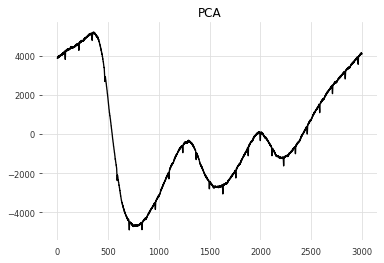

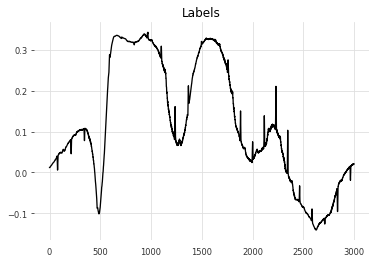

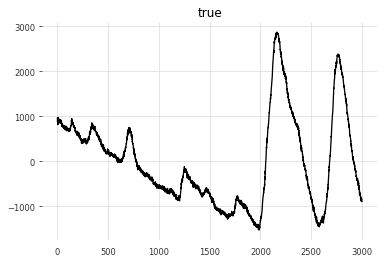

In [51]:
true_data = detrend_ts(true_data)
true_driver = np.squeeze(detrend_ts(true_driver[:, None]))

from sklearn.decomposition import PCA
embedding = PCA()
data_pca = embedding.fit_transform(true_data)[:, 0]


# model = RecurrenceManifold(random_state=0, detrend=True, n_samples_pseudotime=100) 
# check stadardization here
model = RecurrenceManifold(random_state=0)#, n_samples_pseudotime=100, sampling_method_pseudotime="shifted_random") 

curr_time()
label_vals0 = model.fit_predict(true_data)
curr_time()


plt.figure()
plt.plot(data_pca, 'k')
plt.title("PCA")

plt.figure()
plt.plot(label_vals0, 'k')
plt.title("Labels")

plt.figure()
plt.plot(true_driver, 'k')
plt.title("true")

0.23 mutual_info
-0.07 conditional_info
0.29 conditional_info_back
0.93 mae
576.76 mape
21.32 marre
1.45 mse
-0.45 r2_score
1.21 rmse
116.41 smape
-0.21 spearman
-0.27 pearson
-0.13 kendalltau
0.52 sync
0.05 coherence
0.26 coherence_phase


0.31 mutual_info
-0.21 conditional_info
-0.06 conditional_info_back
0.93 mae
492.84 mape
21.3 marre
1.38 mse
-0.38 r2_score
1.17 rmse
116.14 smape
0.32 spearman
0.31 pearson
0.17 kendalltau
0.44 sync
0.05 coherence
1.0 coherence_phase




Text(0.5, 1.0, 'Labels vs PCA: -0.7913448017049779 0.0')

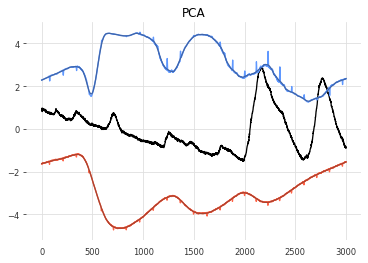

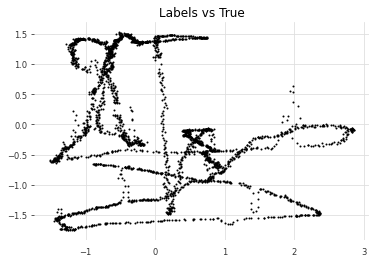

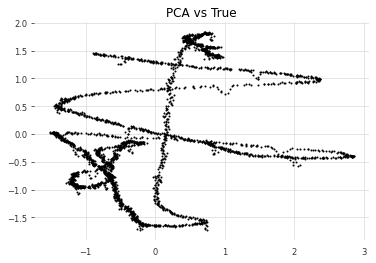

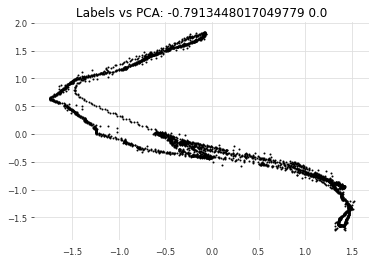

In [53]:
import degas as dg
from scipy.signal import savgol_filter

true_driver = np.squeeze(standardize_ts(true_driver[:, None]))
label_vals = np.squeeze(standardize_ts(nan_fill(label_vals0)[:, None]))
pca_vals = np.squeeze(standardize_ts(data_pca[:, None]))

## derivatives
# true_driver = np.squeeze(standardize_ts(np.diff(true_driver)[:, None]))
# label_vals = np.squeeze(standardize_ts(np.diff(nan_fill(label_vals0))[:, None]))
# pca_vals = np.squeeze(standardize_ts(np.diff(data_pca)[:, None]))

# label_vals = savgol_filter(label_vals, 131, 3)
# pca_vals = savgol_filter(pca_vals, 131, 3)

# label_vals = savgol_filter(label_vals, 131, 3, deriv=1)
# pca_vals = savgol_filter(pca_vals, 131, 3, deriv=1)
# true_driver = savgol_filter(true_driver, 11, 3, deriv=1)
# true_driver *= 10

plt.figure()
plt.plot(true_driver, 'k')
plt.title("True")

# plt.figure()
plt.plot(3 + label_vals, color=dg.blue)
plt.plot(savgol_filter(3 + label_vals, 131, 3), color=dg.darker(dg.blue))
# plt.plot(np.cumsum(label_vals - np.mean(label_vals)))
plt.title("Labels")

# plt.figure()
plt.plot(-3 + pca_vals, color=dg.red)
plt.plot(savgol_filter(-3 + pca_vals , 131, 3), color=dg.darker(dg.red))
plt.title("PCA")




plt.figure()
plt.plot(true_driver, label_vals, '.k', markersize=2)
print_dict(score_ts(true_driver, label_vals))
plt.title("Labels vs True")


plt.figure()
plt.plot(true_driver, pca_vals, '.k', markersize=2)
print_dict(score_ts(true_driver, pca_vals))
plt.title("PCA vs True")

plt.figure()
plt.plot(label_vals, pca_vals, '.k', markersize=2)
corr = spearmanr(label_vals, pca_vals)
plt.title("Labels vs PCA: " + str(corr.correlation) + " " + str(corr.pvalue))


In [ ]:
# true_data = np.load("ecg2.pkl", allow_pickle=True)
# true_driver = np.load("drive_ecg2.pkl", allow_pickle=True)


# from scipy.ndimage import gaussian_filter1d 
# all_out = list()
# for row in true_data.T:
#     sig = row
#     #sig = resample(row, len(row) * 8)
#     #sig = savgol_filter(sig, 501, 3)
#     sig = gaussian_filter1d(sig, 61)
#     all_out.append(sig)
# true_data = np.vstack(all_out).T
# true_driver = gaussian_filter1d(true_driver, 61)

# plt.figure()
# plt.plot(true_data);

# from sklearn.decomposition import PCA
# embedding = PCA()
# data_pca = embedding.fit_transform(standardize_ts(true_data))
# plt.figure()
# plt.plot(data_pca[:, 0], 'k')
# plt.title("PCA")
# plt.plot(data_pca[:, 0], true_driver, 'k')


# plt.figure()
# plt.plot(np.median(standardize_ts(true_data), axis=-1))
# plt.title("median trend")


# model = RecurrenceManifold(weighted_connectivity=True, start="multiple") 
# # model = RecurrenceManifold(weighted_connectivity=True, merge="percentile") 
# label_vals = model.fit_predict(true_data) 

# plt.figure()
# plt.plot(true_driver, 'k')
# plt.title("true signal")

# plt.figure()
# plt.plot(label_vals, 'k')

# plt.figure()
# # plt.semilogy(label_vals, 'k')
# plt.plot(label_vals, true_driver[:len(label_vals)][:], 'k')

# Fluid mixing

Text(0.5, 1.0, 'median trend')

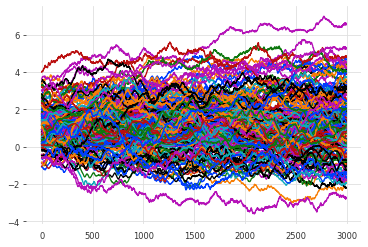

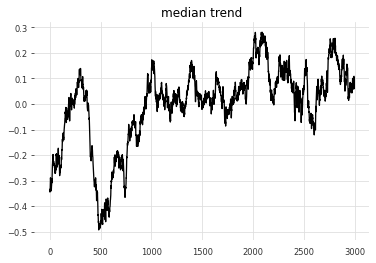

In [124]:
# dpath = "/Users/williamgilpin/Downloads/gyre.pkl"
# all_data = np.load(dpath, allow_pickle=True)

# dpath = "/Users/williamgilpin/Downloads/gyre.pkl"
# all_data1 = np.load(dpath, allow_pickle=True)
# dpath = "/Users/williamgilpin/Downloads/gyre2.pkl"
# all_data2 = np.load(dpath, allow_pickle=True)
# all_data = np.vstack([all_data1, all_data2])

# dpath = "/Users/williamgilpin/Downloads/gyre3.pkl"
# all_data = np.load(dpath, allow_pickle=True)

# dpath = "/Users/williamgilpin/Downloads/gyre_n2.pkl"
# all_data = np.load(dpath, allow_pickle=True)

# dpath = "/Users/williamgilpin/Downloads/gyre_p1.pkl"
# all_data = np.load(dpath, allow_pickle=True)



# dpath = "/Users/williamgilpin/Downloads/gyre_p1.pkl"
# all_data1 = np.load(dpath, allow_pickle=True)
# dpath = "/Users/williamgilpin/Downloads/gyre_p2.pkl"
# all_data2 = np.load(dpath, allow_pickle=True)
# all_data = np.vstack([all_data1, all_data2])


dpath = "/Users/williamgilpin/Downloads/gyre_g1.pkl"
all_data1 = np.load(dpath, allow_pickle=True)
dpath = "/Users/williamgilpin/Downloads/gyre_g2.pkl"
all_data2 = np.load(dpath, allow_pickle=True)
all_data = np.vstack([all_data1, all_data2])


## OK
# dpath = "/Users/williamgilpin/Downloads/gyre_g3.pkl"
# all_data1 = np.load(dpath, allow_pickle=True)
# dpath = "/Users/williamgilpin/Downloads/gyre_g4.pkl"
# all_data2 = np.load(dpath, allow_pickle=True)
# dpath = "/Users/williamgilpin/Downloads/gyre_g5.pkl"
# all_data3 = np.load(dpath, allow_pickle=True)
# all_data = np.vstack([all_data2, all_data1, all_data3])

# dpath = "/Users/williamgilpin/Downloads/gyre_g4.pkl"
# all_data = np.load(dpath, allow_pickle=True)


# dpath = "/Users/williamgilpin/Downloads/gyre_h2.pkl"
# all_data = np.load(dpath, allow_pickle=True)

# OK
# dpath = "/Users/williamgilpin/Downloads/gyre_h1.pkl"
# all_data1 = np.load(dpath, allow_pickle=True)
# dpath = "/Users/williamgilpin/Downloads/gyre_h2.pkl"
# all_data2 = np.load(dpath, allow_pickle=True)
# dpath = "/Users/williamgilpin/Downloads/gyre_h3.pkl"
# all_data3 = np.load(dpath, allow_pickle=True)
# all_data = np.vstack([all_data1, all_data2, all_data3])


## Good
# dpath = "/Users/williamgilpin/Downloads/gyre_n2_noise.pkl"
# all_data1 = np.load(dpath, allow_pickle=True)
# dpath = "/Users/williamgilpin/Downloads/gyre_n2_noise2.pkl"
# all_data2 = np.load(dpath, allow_pickle=True)
# dpath = "/Users/williamgilpin/Downloads/gyre_n2_noise3.pkl"
# all_data3 = np.load(dpath, allow_pickle=True)
# dpath = "/Users/williamgilpin/Downloads/gyre_n2_noise4.pkl"
# all_data4 = np.load(dpath, allow_pickle=True)
# dpath = "/Users/williamgilpin/Downloads/gyre_n2_noise5.pkl"
# all_data5 = np.load(dpath, allow_pickle=True)
# all_data = np.vstack([all_data1, all_data2, all_data3, all_data4, all_data5])

# dpath = "/Users/williamgilpin/Downloads/gyre_n2_noise.pkl"
# all_data = np.load(dpath, allow_pickle=True)


# true_driver = all_data[0, :, -1]
# true_data = np.swapaxes(all_data[:, :, 0], 0, -1)
# true_data = np.sqrt(all_data[:, :, 0]**2 + all_data[:, :, 1]**2).T
# true_data = np.arctan2(all_data[:, :, 1], all_data[:, :, 0]).T
# true_data = detrend_ts(all_data[:, :, 0].T)
# true_data = all_data[:, :, 1].T
true_data = all_data[:, :, 0].T


true_driver0 = all_data[0, :, -1]
true_data = true_data[:-10]
true_driver0 = true_driver0[:-10]


plt.figure()
plt.plot(true_data);


plt.figure()
plt.plot(np.median(standardize_ts(true_data), axis=-1))
plt.title("median trend")


Current Time:  01:32:13
Current Time:  01:32:13
Computing distance matrix... Current Time:  01:32:55
done.
Current Time:  01:32:55
Matrix sparsity is:  0.9900001118555721
Current Time:  01:32:55
Assigning pseudotime labels.
....................

Current Time:  01:33:26


Text(0.5, 1.0, 'true')

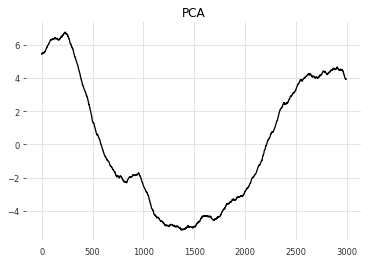

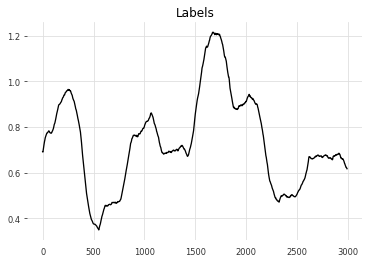

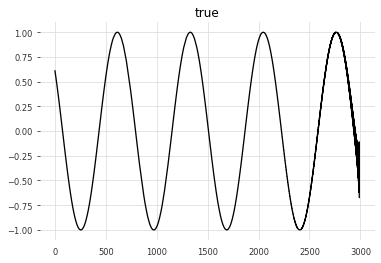

In [125]:
true_data = detrend_ts(true_data)
true_driver = np.squeeze(detrend_ts(true_driver[:, None]))

from sklearn.decomposition import PCA
embedding = PCA()
data_pca = embedding.fit_transform(true_data)[:, 0]

# model = RecurrenceManifold(random_state=0, detrend=True, n_samples_pseudotime=100) 
# check stadardization here
model = RecurrenceManifold(random_state=0)#, n_samples_pseudotime=100, sampling_method_pseudotime="shifted_random") 

curr_time()
label_vals0 = model.fit_predict(true_data)
curr_time()


plt.figure()
plt.plot(data_pca, 'k')
plt.title("PCA")

plt.figure()
plt.plot(label_vals0, 'k')
plt.title("Labels")

plt.figure()
plt.plot(true_driver0, 'k')
plt.title("true")

0.24 mutual_info
0.28 conditional_info
0.08 conditional_info_back
0.88 mae
1984.9 mape
30.66 marre
1.13 mse
-0.13 r2_score
1.06 rmse
116.72 smape
-0.43 spearman
-0.44 pearson
-0.31 kendalltau
0.51 sync
0.04 coherence
0.65 coherence_phase
0.49 cross forecast error
0.55 cross forecast error neural
0.41 cross forecast error neural 2


0.17 mutual_info
0.26 conditional_info
0.4 conditional_info_back
1.13 mae
2035.6 mape
39.39 marre
1.98 mse
-0.98 r2_score
1.41 rmse
134.16 smape
0.02 spearman
-0.01 pearson
0.01 kendalltau
0.38 sync
0.05 coherence
0.5 coherence_phase
0.55 cross forecast error
0.64 cross forecast error neural
0.43 cross forecast error neural 2




Text(0.5, 1.0, 'Labels vs PCA: 0.49374590829512566 1.4665652152026474e-183')

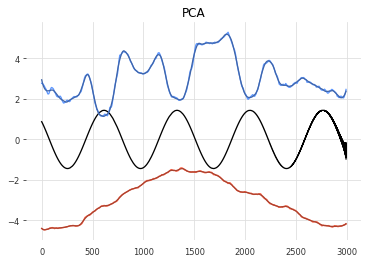

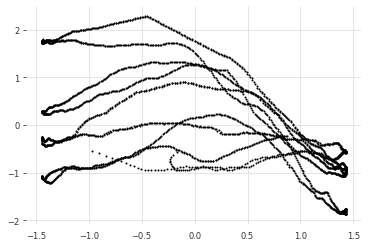

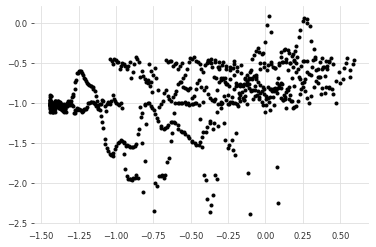

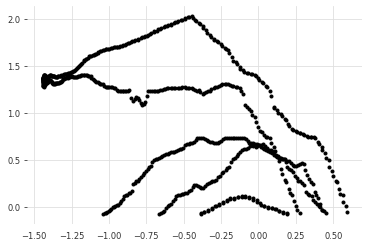

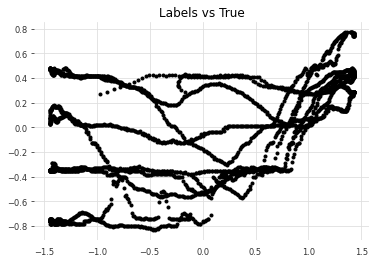

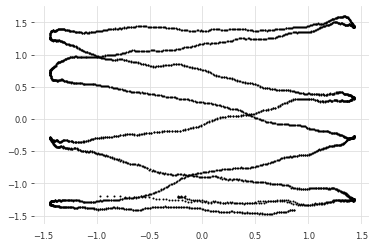

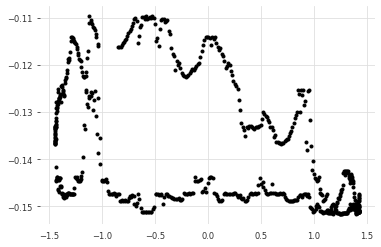

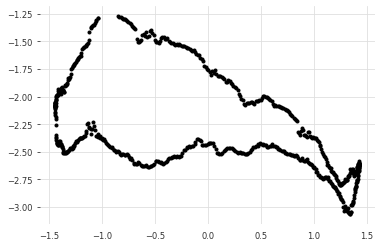

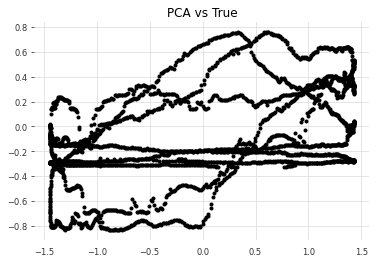

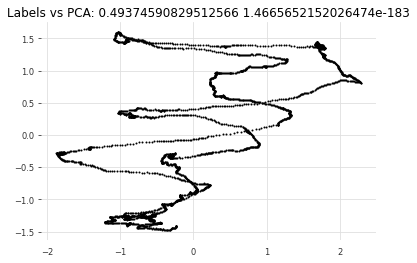

In [123]:
import degas as dg
from scipy.signal import savgol_filter
from benchmark_utils import print_dict, score_ts

true_driver = standardize_ts(true_driver0)
label_vals = standardize_ts(label_vals0)
pca_vals = standardize_ts(data_pca)

## derivatives
# true_driver = np.squeeze(standardize_ts(np.diff(true_driver)[:, None]))
# label_vals = np.squeeze(standardize_ts(np.diff(nan_fill(label_vals0))[:, None]))
# pca_vals = np.squeeze(standardize_ts(np.diff(data_pca)[:, None]))

# label_vals = savgol_filter(label_vals, 131, 3)
# pca_vals = savgol_filter(pca_vals, 131, 3)

# label_vals = savgol_filter(label_vals0, 41, 3, deriv=1)
# pca_vals = savgol_filter(data_pca, 41, 3, deriv=1)
# true_driver = savgol_filter(true_driver0, 41, 3, deriv=1)


plt.figure()
plt.plot(true_driver, 'k')
plt.title("True")

# plt.figure()
plt.plot(3 + label_vals, color=dg.blue)
plt.plot(savgol_filter(3 + label_vals, 131, 3), color=dg.darker(dg.blue))
# plt.plot(np.cumsum(label_vals - np.mean(label_vals)))
plt.title("Labels")

# plt.figure()
plt.plot(-3 + pca_vals, color=dg.red)
plt.plot(savgol_filter(-3 + pca_vals , 131, 3), color=dg.darker(dg.red))
plt.title("PCA")




plt.figure()
plt.plot(true_driver, label_vals, '.k', markersize=2)
print_dict(score_ts(true_driver, label_vals))
plt.title("Labels vs True")


plt.figure()
plt.plot(true_driver, pca_vals, '.k', markersize=2)
print_dict(score_ts(true_driver, pca_vals))
plt.title("PCA vs True")

plt.figure()
plt.plot(label_vals, pca_vals, '.k', markersize=2)
corr = spearmanr(label_vals, pca_vals)
plt.title("Labels vs PCA: " + str(corr.correlation) + " " + str(corr.pvalue))


0.17 mutual_info
-0.08 conditional_info
0.47 conditional_info_back
0.69 mae
115.49 mape
21.2 marre
0.72 mse
0.28 r2_score
0.85 rmse
124.42 smape
0.5 spearman
0.53 pearson
0.37 kendalltau
0.62 sync
0.04 coherence
0.22 coherence_phase


0.12 mutual_info
-1.11 conditional_info
0.62 conditional_info_back
0.87 mae
110.49 mape
27.0 marre
0.97 mse
0.03 r2_score
0.98 rmse
174.79 smape
0.16 spearman
0.18 pearson
0.1 kendalltau
0.44 sync
0.05 coherence
1.0 coherence_phase




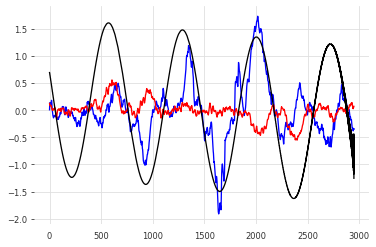

In [1279]:

    

plt.plot(
    cross_forecast(label_vals, true_driver, tau=40), 'b',
)
plt.plot(
    cross_forecast(pca_vals, true_driver, tau=40), 'r',
)

plt.plot(true_driver[40:], 'k')

print_dict(
    score_ts(
        true_driver[40:],
        cross_forecast(label_vals, true_driver, tau=40)
    )
)

print_dict(
    score_ts(
        true_driver[40:],
        cross_forecast(pca_vals, true_driver, tau=40)
    )
)




/Users/williamgilpin/miniconda3/envs/ndyn/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/williamgilpin/miniconda3/envs/ndyn/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


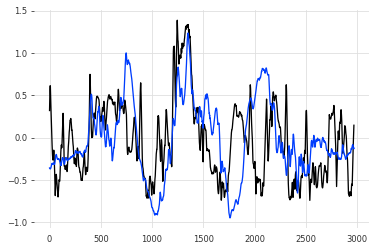

In [1013]:
plt.plot(
    cross_forecast(label_vals, true_driver, tau=20, model="mlp")
)
plt.plot(
    cross_forecast(pca_vals, true_driver, tau=20, model="mlp")
)

In [820]:
from benchmark_utils import PhaseCoherence, coherence_phase

PhaseCoherence(np.vstack([true_driver, pca_vals]), FS=10)

Number of measurements = 2
Number of time samples = 3000 = 300.0 seconds
[0.9423597504-0.3346014058j 0.8239503141+0.5666620508j] [-0.3411822238  0.6024490313]


0.8907445463173919

In [811]:
PhaseCoherence(np.vstack([true_driver, label_vals]), FS=10)

Number of measurements = 2
Number of time samples = 3000 = 300.0 seconds


0.9752993605118712

In [793]:
from scipy.signal import coherence

np.mean(coherence(true_driver, pca_vals)[1])

0.05468393922810587

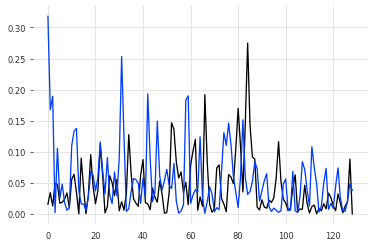

In [791]:
plt.plot(coherence(label_vals, true_driver)[1])
plt.plot(coherence(pca_vals, true_driver)[1])

In [788]:
np.median(coherence(true_driver, label_vals)[1])

0.02708416375220494

In [777]:
print_dict(score_ts(true_driver, pca_vals))
print_dict(score_ts(-true_driver, pca_vals))

0.19 mutual_info
-0.01 conditional_info
0.4 conditional_info_back
0.46 sync
1.11 mae
717.57 mape
33.21 marre
1.74 mse
-0.74 r2_score
1.32 rmse
128.89 smape
-0.13 spearman
-0.13 pearson
-0.08 kendalltau


0.19 mutual_info
-0.01 conditional_info
0.4 conditional_info_back
0.46 sync
1.11 mae
717.57 mape
33.21 marre
1.74 mse
-0.74 r2_score
1.32 rmse
128.89 smape
0.13 spearman
0.13 pearson
0.08 kendalltau




## Datasets

+ Plankton
+ Fetus / Physionet
+ Fitness tracker
+ Fluids

# Appendix

In [ ]:



def dstack_to_connectivity(dstack):
    """
    Given a stack of M pairwise distance matrices of shape N x N x M, compute a 
    single consolidated N x N connectivity or adjacency matrix
    
    Args:
        dstack (array-like): A batch of pairwise distance matrices stacked along the 
            last axis
    """
    
#     bdstack = distance_to_connectivity(dstack) # connectivity matrix
#     dscale = np.mean(dstack, axis=(0, 1), keepdims=True)
#     weights = np.exp(-dstack / dscale) # weights scale each connection by batch scale
#     return np.sum(weights * bdstack, axis=-1)

    nb = dstack.shape[-1]
    all_cmats = list()
    for i in range(nb):
        all_cmats.append(
            distance_to_connectivity(
                dstack[..., i], 
                dscale=np.mean(dstack[..., i])
            )
        )
    bdstack = np.dstack(all_cmats)
    return np.sum(bdstack, axis=-1)

    
#     nb = dstack.shape[-1]
#     all_cmats = list()
#     for i in range(nb):
#         all_cmats.append(distance_to_connectivity(dstack[..., i]))
#     bdstack = np.dstack(all_cmats)
    
#     return np.min(bdstack, axis=-1)
    #return np.sum(bdstack, axis=-1)

#     nb = dstack.shape[-1]
#     all_cmats = list()
#     for i in range(nb):
#         all_cmats.append(distance_to_connectivity(dstack[..., i]))
#     bdstack = np.dstack(all_cmats)
#     return np.sum(bdstack, axis=-1)
    
#     # find kNN for each distance matrix separately, then consolidate somehow?
#     # the min says "once a neigbor, always a neighbor"
    
    
#     Neighbors are defined relative to others in same batch member.
#     Pooling after neighbor assignment is helpful for when the response subsystems are really different
    
    
#     How does this work? Assign neighbors 
    
#     take mean of each batch example and scale the distance matrix by it (add 1e-16 for conditioning)
    

        
        # connectivity ranked locally for each frame
        # next we need to pool across frames. min pooling
        # try sum pooling
        
        
        # can also try normalizing connectivity based on all frames, to get a global estimate
        
    

